# Исследование объявлений о продаже квартир

**Цель исследования:**  
Основная цель проекта заключается в проведении комплексного анализа данных о рынке недвижимости Санкт-Петербурга и разработке методологии определения рыночной стоимости квартир на основе множества параметров.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Описание данных:**
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

## Загрузка данных

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
# Настройка отоброжения и подключение Google Colab
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')  # Для практикума
except FileNotFoundError:
    try:
        data = pd.read_csv('Модуль 1 спринт 1/real_estate_data.csv', sep='\t')  # Если файл локальный
    except FileNotFoundError:
        try:
            data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Модуль 1/Модуль 1 спринт 1/real_estate_data.csv', sep='\t')  # Для Google Colab
        except FileNotFoundError:
            print('Файл не найден ни в одном из указанных мест.')
            contract = None

Выполним первичный анализ данных.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0        51.00      8          NaN   False   
1             NaN          11.0        18.60      1          NaN   False   
2             NaN           5.0        34.30      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0        32.00     13          NaN   False   
5             NaN          12.0        14.40      5          NaN   False   
6             NaN          26.0        10.60      6          NaN   False   
7             NaN          24.0          NaN     22          NaN   False   
8             NaN          27.0        15.43     26          NaN   False   
9            2.50           9.0        43.60      7          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False         25.00      NaN            Санкт-Петербург   
1      False         11.00      2.0             посёлок Шушары   
2      False          8.30      0.0            Санкт-Петербург   
3      False           NaN      0.0            Санкт-Петербург   
4      False         41.00      NaN            Санкт-Петербург   
5      False          9.10      NaN  городской посёлок Янино-1   
6      False         14.40      1.0          посёлок Парголово   
7      False         18.90      2.0            Санкт-Петербург   
8      False          8.81      NaN             посёлок Мурино   
9      False          6.50      2.0            Санкт-Петербург   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0           18863.0              16028.0               1.0          482.0   
1           12817.0              18603.0               0.0            NaN   
2           21741.0              13933.0               1.0           90.0   
3           28098.0               6800.0               2.0           84.0   
4           31856.0               8098.0               2.0          112.0   
5               NaN                  NaN               NaN            NaN   
6           52996.0              19143.0               0.0            NaN   
7           23982.0              11634.0               0.0            NaN   
8               NaN                  NaN               NaN            NaN   
9           50898.0              15008.0               0.0            NaN   

   ponds_around3000  ponds_nearest  days_exposition  
0               2.0          755.0              NaN  
1               0.0            NaN             81.0  
2               2.0          574.0            558.0  
3               3.0          234.0            424.0  
4               1.0           48.0            121.0  
5               NaN            NaN             55.0  
6               0.0            NaN            155.0  
7               0.0            NaN              NaN  
8               NaN            NaN            189.0  
9               0.0            NaN            289.0

In [6]:
data.tail()

total_images  last_price  total_area first_day_exposition  rooms  \
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
23694             3.7           5.0         73.3      3          NaN   False   
23695             NaN           5.0         38.0      4          NaN   False   
23696             NaN           3.0         29.7      1          NaN   False   
23697             3.0          17.0          NaN     12          NaN   False   
23698             2.5           5.0         12.3      1          NaN   False   

       open_plan  kitchen_area  balcony        locality_name  \
23694      False         13.83      NaN      Санкт-Петербург   
23695      False          8.50      NaN                Тосно   
23696      False           NaN      NaN     село Рождествено   
23697      False         23.30      2.0      Санкт-Петербург   
23698      False          9.00      NaN  поселок Новый Учхоз   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
23694           24665.0               4232.0               1.0          796.0   
23695               NaN                  NaN               NaN            NaN   
23696               NaN                  NaN               NaN            NaN   
23697           39140.0              10364.0               2.0          173.0   
23698               NaN                  NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
23694               3.0          381.0              NaN  
23695               NaN            NaN             45.0  
23696               NaN            NaN              NaN  
23697               3.0          196.0            602.0  
23698               NaN            NaN              NaN

Гистограммы по числовым столбцам датафрейма

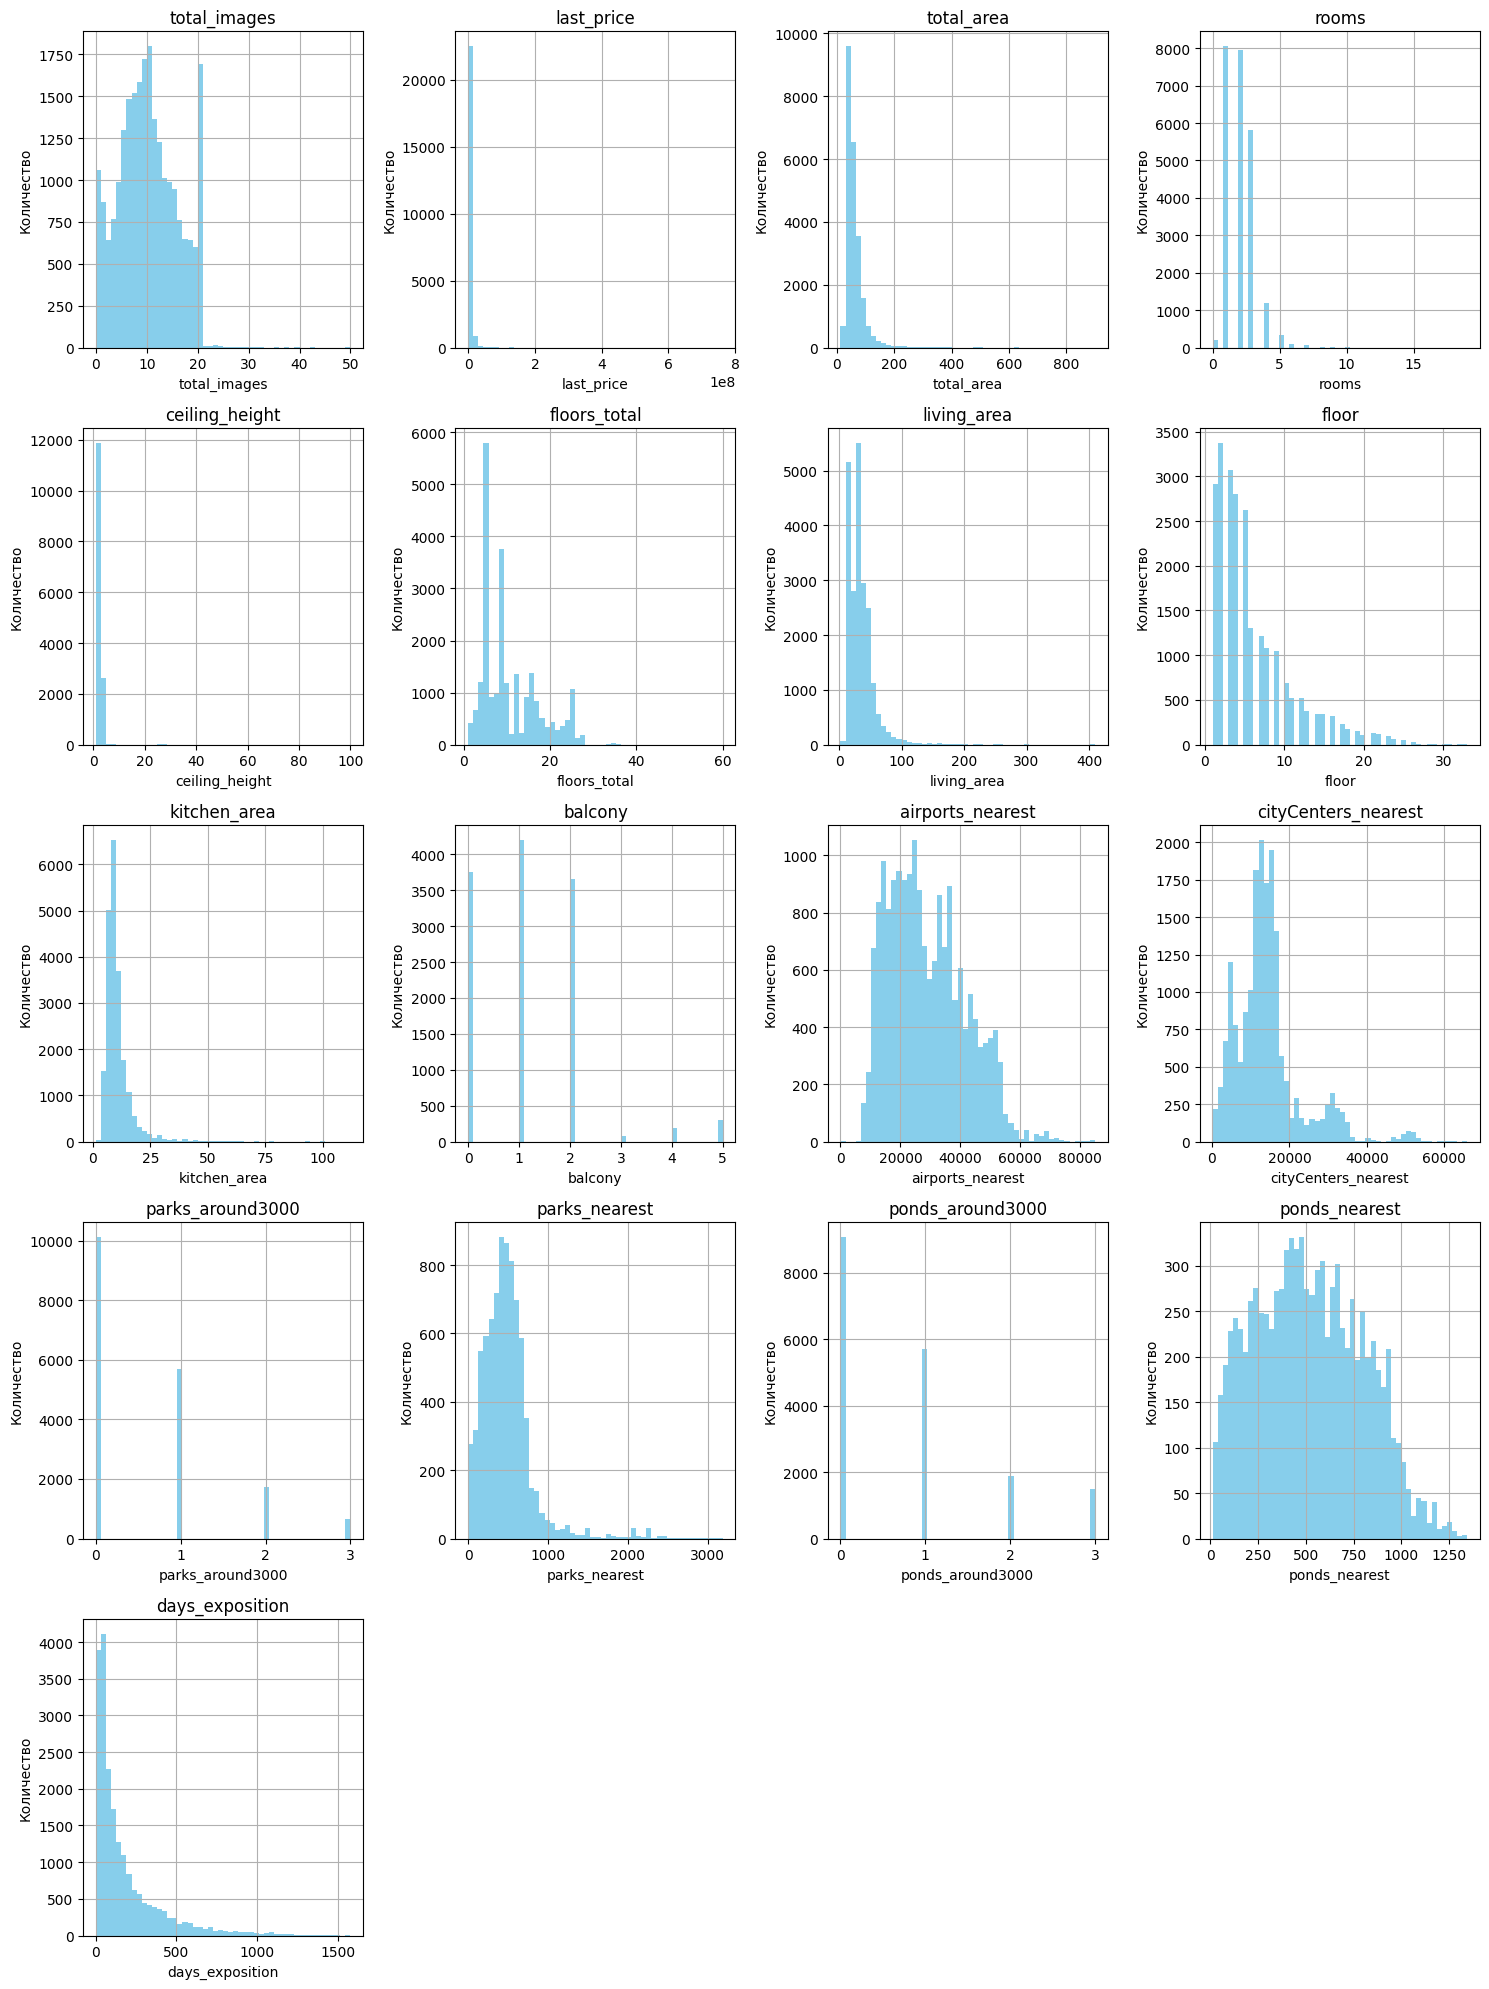

In [7]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 20))
axes = axes.flatten()

for i, j in enumerate(data.select_dtypes(include='number')):
    axes[i].hist(data[j], bins=50, color='skyblue')
    axes[i].grid(True)
    axes[i].set_title(f'{j}')
    axes[i].set_xlabel(j)
    axes[i].set_ylabel('Количество')

# Убираем пустые подграфики, если они есть
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Корректируем расположение графиков
plt.show()

Промежуточный вывод:
- Графики (слева на право) 2, 3, 4, 5, 7, 9, 14, 17 имеют не хакетерный для гистограмм, тип распределния
- Столбец `its_apertment` должене иметь булевый тип данных
- Столбецы `first_day_exposition` и нужно преобразовать в datetime
- Требуется выоплнить предобработку данных из за наличии пропусков

## Предобработка данных

In [8]:
# Определим количество пропущенных значений в каждом столбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Так как наша задача состоит в том, чтобы определить рыночную стоимость объектов недвижимости, то постараемся вычленить те столбцы которые нужно обязательно спасти от пропусков.

* `ceiling_height` - высота потолков, должна иметь влияние на итоговую стоимость недвижимости
* `floors_tota` - малое количество пропусков в столбце количества этажей, что меньше 0,36% от количества всех объявлений
* `living_area` - жилая площадь квартиры, нужно сохранить как можно больше данных
* `is_apartment` - более 88% пропусков в столбце
* `kitchen_area` - нужно сохранить больше данных
* `balcony` - заменим NaN на 0?
* `locality_name` - название населённого пункта, видимо данны останутся утерянными, подумаем...

Данные полученные автоматически на основе картографических данных, также имеют пропуски. В теории пропуски можно заменить категориальными данными, взяв в основу гипотезу, чем дальше от центра тем квартира дороже.

In [9]:
# Переименуем столбец cityCenters_nearest
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

Рассмотрим подробнее каждый столбец, начнем с `total_images`

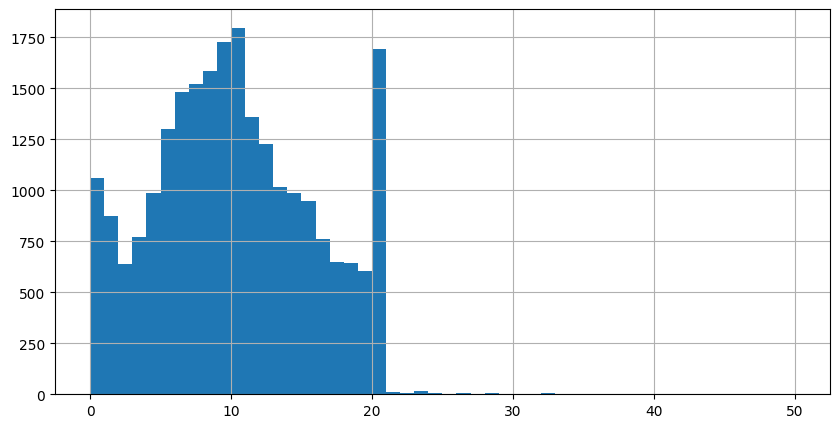

In [10]:
# Построим гистограмму для столбца total_images
data['total_images'].hist(bins=50, figsize=(10, 5));

In [11]:
# Посчитаем количество строк где фотографий от 20
len(data[(20 < data['total_images']) & (data['total_images'] < 50)])

72

Основном объявления недвижимости имеют количество фотографий от 10 до 20 фотографий. Данные выглядят правдоподобно. Если 72 случая - аномальные значения, считаю это допустимой погрешностью

**Рассмотрим подробнее столбец `last_price`**

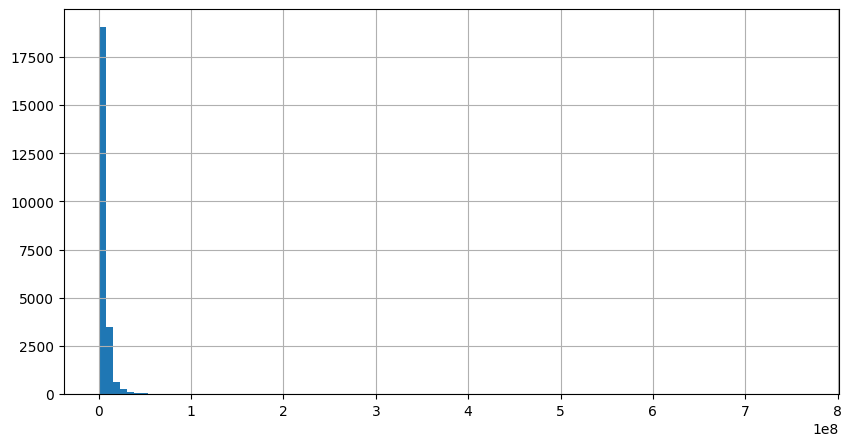

In [12]:
data['last_price'].hist(bins=100, figsize=(10, 5));

In [13]:
data['last_price'].describe() / 1000000

count      0.023699
mean       6.541549
std       10.887013
min        0.012190
25%        3.400000
50%        4.650000
75%        6.800000
max      763.000000
Name: last_price, dtype: float64

Text(0.5, 1.0, 'Цена продажи')

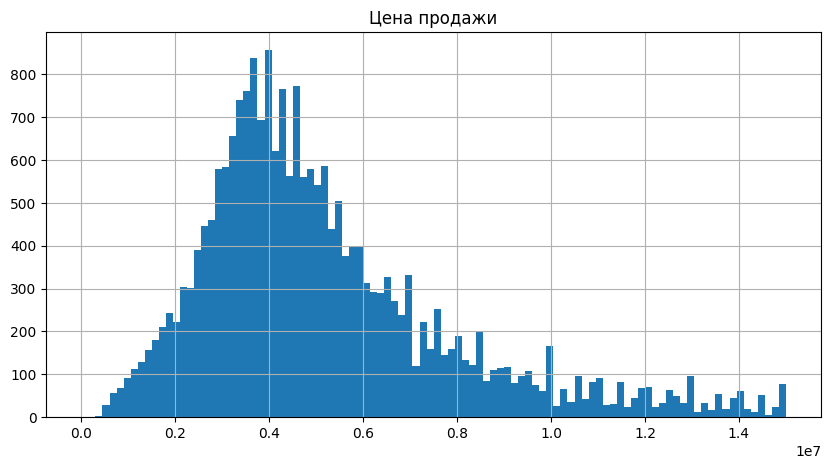

In [14]:
data['last_price'].hist(bins=100, range=(0, 15000000), figsize=(10, 5))
plt.title('Цена продажи')

Text(0.5, 1.0, 'Цена продажи')

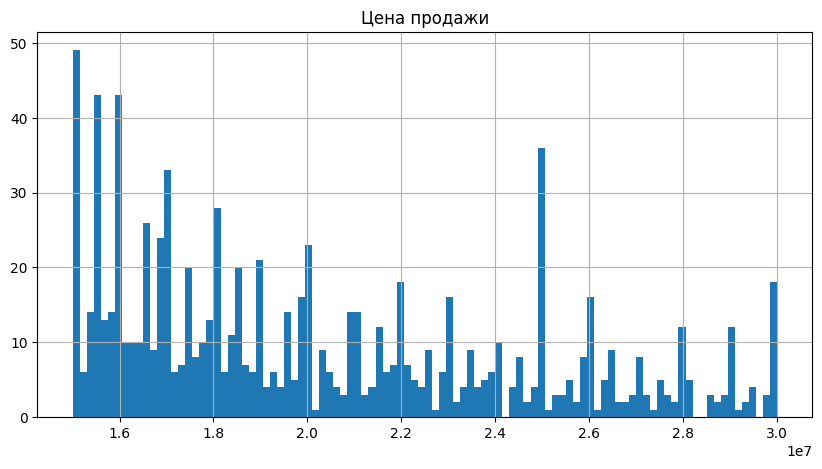

In [15]:
data['last_price'].hist(bins=100, range=(15000000, 30000000), figsize=(10, 5))
plt.title('Цена продажи')

Text(0.5, 1.0, 'Цена продажи')

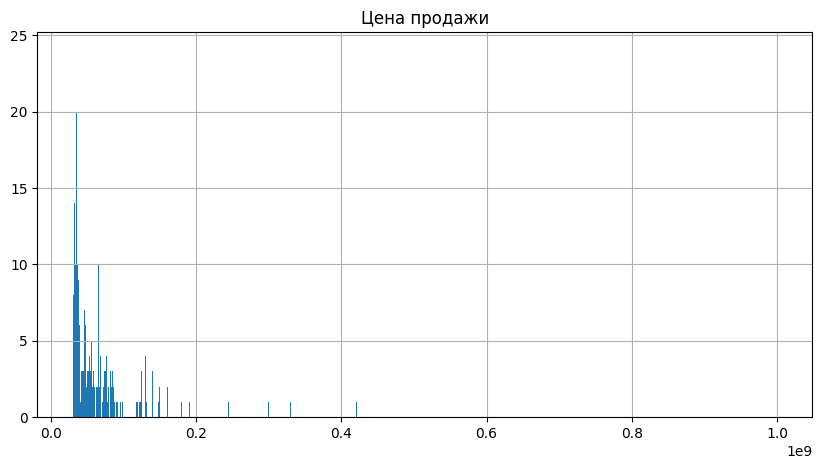

In [16]:
data['last_price'].hist(bins=1000, range=(30000000, 1000000000), figsize=(10, 5))
plt.title('Цена продажи')

Самая дешевая квартира стоит 12190 рублей, а самая дорогая 763000000 рублей. Данные выглядят правдоподобно!

**Изучим столбец `total_area`**

Text(0.5, 1.0, 'Общая площадь')

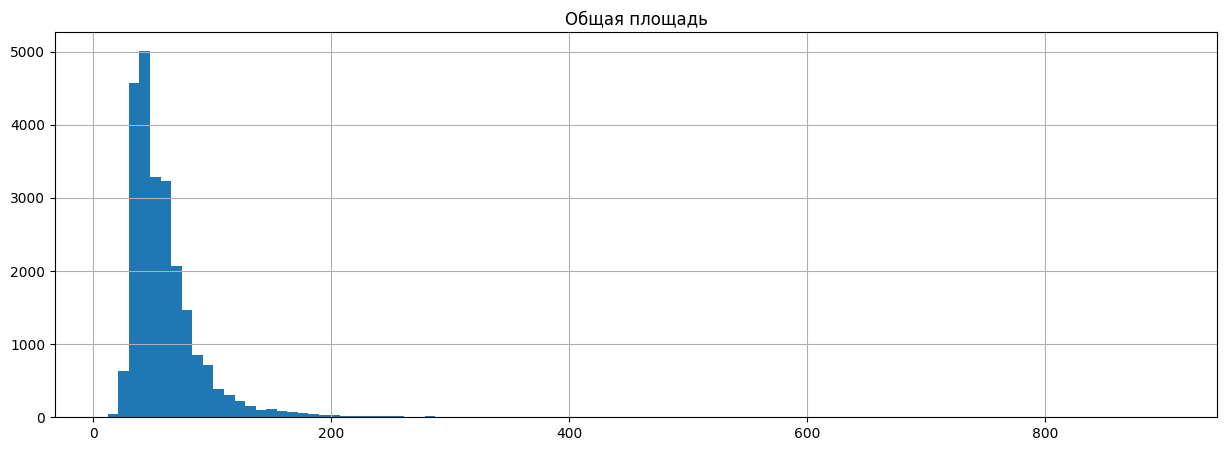

In [17]:
data['total_area'].hist(bins=100, figsize=(15, 5))
plt.title('Общая площадь')

In [18]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

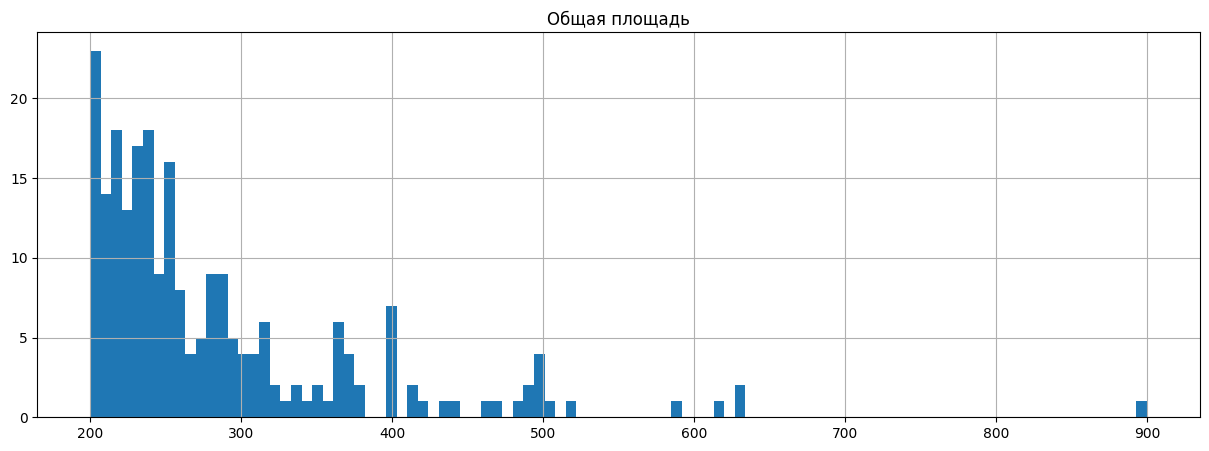

In [19]:
data['total_area'].hist(bins=100, range=(200, 900), figsize=(15, 5))
plt.title('Общая площадь');

In [20]:
# посчитаем количество строк с площадью от 200 метров в квадрате

len(data[(200 <= data['total_area']) & (data['total_area'] <= 1000)])

231

В целом данные выглядят правдоподобно, 231 считаю приемлемой погрешностью

**Преобразуем столбец `first_day_exposition` в datetime**

In [21]:
# Используем метод to_datetime

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [22]:
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Столбец принял формат datetime!

**Рассмотрим столбец `rooms`**

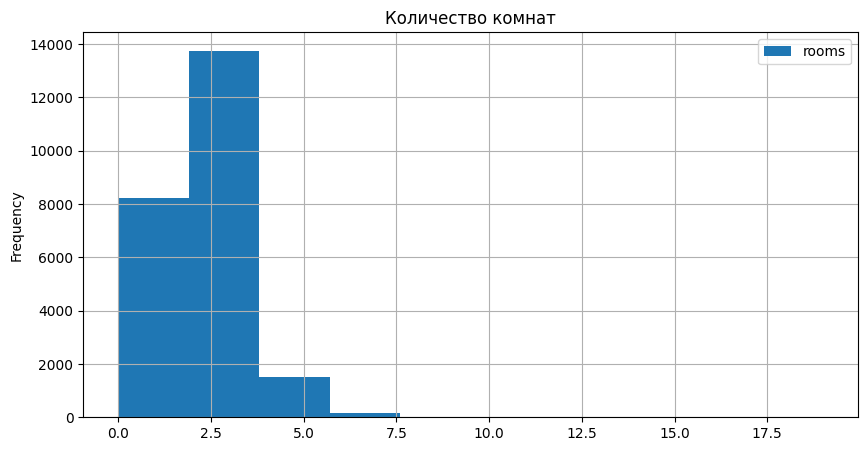

In [23]:
data.plot(y='rooms', kind='hist', figsize=(10, 5), grid=True, title='Количество комнат');

In [24]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Изучим сколько квартир с 0 комнат, возможно это студии!

In [25]:
# Проверим количество строк, где количество комнат 0

data.query('rooms == 0').shape[0]

197

Всего таких столбцов 197. Изучим сколько таких столбцов, где количество комнат равно нулю и студия равно True

In [26]:
data.query('rooms == 0 and studio == True').shape[0]

138

Таких строк 138, можно прийти к итогу, что 138 строк это студии. А остальную часть, раcсмотрим подробнее

In [27]:
display(data.query('rooms == 0 and studio == False').head())
data.query('rooms == 0 and studio == False').tail()

total_images  last_price  total_area first_day_exposition  rooms  \
349             4   2320000.0        25.0           2017-09-27      0   
508             0   3375000.0        34.4           2017-03-28      0   
780             9   2600000.0        26.1           2018-02-20      0   
839            14   1900000.0        35.0           2017-04-14      0   
946             5   2200000.0        23.0           2016-09-27      0   

     ceiling_height  floors_total  living_area  floor is_apartment  studio  \
349             NaN          14.0         17.0      1          NaN   False   
508             NaN          26.0         24.3     19          NaN   False   
780             NaN          18.0          NaN      8          NaN   False   
839             2.7           5.0         15.0      3        False   False   
946             NaN          27.0         18.0      7          NaN   False   

     open_plan  kitchen_area  balcony       locality_name  airports_nearest  \
349       True           NaN      0.0     деревня Кудрово               NaN   
508       True           NaN      1.0   посёлок Парголово           53115.0   
780       True           NaN      1.0      посёлок Мурино               NaN   
839       True           NaN      1.0  поселок Новый Свет               NaN   
946       True           NaN      2.0      посёлок Мурино               NaN   

     city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
349                   NaN               NaN            NaN               NaN   
508               19292.0               0.0            NaN               1.0   
780                   NaN               NaN            NaN               NaN   
839                   NaN               NaN            NaN               NaN   
946                   NaN               NaN            NaN               NaN   

     ponds_nearest  days_exposition  
349            NaN             45.0  
508          593.0            430.0  
780            NaN             45.0  
839            NaN              7.0  
946            NaN            483.0

total_images  last_price  total_area first_day_exposition  rooms  \
21299            13   2450000.0        28.5           2017-11-22      0   
21628             9   3900000.0        34.0           2017-03-18      0   
22573             8   2250000.0        24.0           2017-09-28      0   
23442             0   2500000.0        27.7           2017-09-28      0   
23592            10   1450000.0        29.0           2017-11-11      0   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
21299             NaN          12.0         18.0      7          NaN   False   
21628             NaN          20.0         24.0     10          NaN   False   
22573             NaN          12.0         15.0      3          NaN   False   
23442             NaN          24.0         18.0      4          NaN   False   
23592             NaN           9.0         18.0      8          NaN   False   

       open_plan  kitchen_area  balcony                locality_name  \
21299       True           NaN      2.0              Санкт-Петербург   
21628       True           NaN      2.0              Санкт-Петербург   
22573       True           NaN      2.0  городской посёлок Новоселье   
23442       True           NaN      2.0               посёлок Мурино   
23592       True           NaN      2.0                   Никольское   

       airports_nearest  city_centers_nearest  parks_around3000  \
21299           20381.0               19383.0               0.0   
21628           15506.0               13615.0               0.0   
22573               NaN                   NaN               NaN   
23442               NaN                   NaN               NaN   
23592               NaN                   NaN               NaN   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  
21299            NaN               1.0          579.0             73.0  
21628            NaN               1.0          767.0            320.0  
22573            NaN               NaN            NaN             45.0  
23442            NaN               NaN            NaN              4.0  
23592            NaN               NaN            NaN             82.0

По выведенным строки можно сказать, что часть строк также могу являться студиями. Так как общая площадь квартир зачастую не превышает 30 кв. метров.

In [28]:
# Изучим строки с количеством комнат подробнее, отсортировав их по площади.

data.query('rooms == 0 and studio == False')['total_area'].describe()

count     59.000000
mean      32.707288
std       44.986261
min       16.000000
25%       25.000000
50%       26.100000
75%       28.250000
max      371.000000
Name: total_area, dtype: float64

Часть квартир с площадью меньше 30 переведем в квартиры - судии.

In [29]:
data.loc[(data['rooms'] == 0) & (data['studio'] == False) & (data['total_area'] <= 30), 'studio'] = True

In [30]:
# Проведем проверку замены
data.query('rooms == 0 and studio == True').shape[0]

187

Изучим строки, где площадь квартиры больше, 30 кв. метров.

In [31]:
data.query('rooms == 0 and studio == False and total_area >= 30')

total_images  last_price  total_area first_day_exposition  rooms  \
508               0   3375000.0       34.40           2017-03-28      0   
839              14   1900000.0       35.00           2017-04-14      0   
4683              2   3650000.0       35.00           2018-02-01      0   
6805              7   1850000.0       31.00           2017-11-10      0   
7008              4   5200000.0       32.30           2017-09-14      0   
7237              8   2999000.0       42.63           2017-11-27      0   
17805            17   2600000.0       31.10           2017-10-25      0   
19392             5  71000000.0      371.00           2018-07-26      0   
19735             1   2800000.0       30.50           2017-10-10      0   
21628             9   3900000.0       34.00           2017-03-18      0   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
508               NaN          26.0         24.3     19          NaN   False   
839              2.70           5.0         15.0      3        False   False   
4683              NaN          25.0         23.4     25          NaN   False   
6805              NaN          18.0         18.0     10          NaN   False   
7008              NaN          11.0         25.5      4          NaN   False   
7237              NaN          16.0         25.7      2          NaN   False   
17805             NaN          16.0         21.4     14          NaN   False   
19392            3.57           7.0          NaN      6          NaN   False   
19735            2.75          25.0         20.0      2          NaN   False   
21628             NaN          20.0         24.0     10          NaN   False   

       open_plan  kitchen_area  balcony       locality_name  airports_nearest  \
508         True           NaN      1.0   посёлок Парголово           53115.0   
839         True           NaN      1.0  поселок Новый Свет               NaN   
4683        True           NaN      NaN     Санкт-Петербург           43431.0   
6805        True           NaN      1.0          Никольское               NaN   
7008        True           NaN      NaN     Санкт-Петербург           30824.0   
7237        True           NaN      2.0     деревня Кудрово               NaN   
17805       True           NaN      2.0     Санкт-Петербург           19212.0   
19392       True           NaN      NaN     Санкт-Петербург           25257.0   
19735       True           NaN      2.0     деревня Кудрово               NaN   
21628       True           NaN      2.0     Санкт-Петербург           15506.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
508                 19292.0               0.0            NaN   
839                     NaN               NaN            NaN   
4683                12188.0               0.0            NaN   
6805                    NaN               NaN            NaN   
7008                 6469.0               1.0          756.0   
7237                    NaN               NaN            NaN   
17805               22637.0               0.0            NaN   
19392                6060.0               1.0          761.0   
19735                   NaN               NaN            NaN   
21628               13615.0               0.0            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
508                 1.0          593.0            430.0  
839                 NaN            NaN              7.0  
4683                0.0            NaN            100.0  
6805                NaN            NaN              7.0  
7008                1.0          936.0             86.0  
7237                NaN            NaN             45.0  
17805               1.0          457.0             44.0  
19392               1.0          584.0             90.0  
19735               NaN            NaN             13.0  
21628               1.0          767.0            320.0

9 столбцов из 10 определим в 1 комнатные квартиры. Квартиру с площадью 371 кв. метров пока оставим в покое.

In [32]:
data.loc[(data['rooms'] == 0) & (data['studio'] == False) & (data['total_area'] >= 30) & (data['total_area'] != 371), 'rooms'] = 1

In [33]:
data.query('rooms == 0 and studio == False and total_area >= 30')

total_images  last_price  total_area first_day_exposition  rooms  \
19392             5  71000000.0       371.0           2018-07-26      0   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
19392            3.57           7.0          NaN      6          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
19392       True           NaN      NaN  Санкт-Петербург           25257.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
19392                6060.0               1.0          761.0   

       ponds_around3000  ponds_nearest  days_exposition  
19392               1.0          584.0             90.0

**Обработаем `ceiling_height`**

Столбец - высота потолков имеет пропуски, количество пропусков - 9195

In [34]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

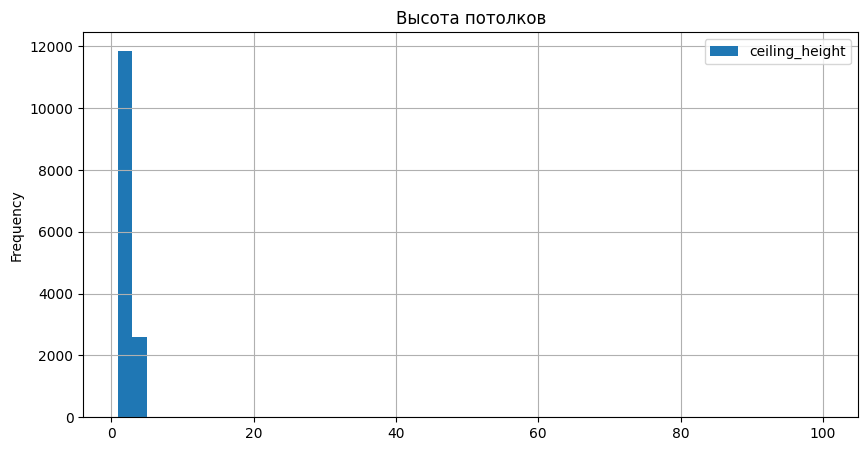

In [35]:
data.plot(y='ceiling_height', kind='hist', bins=50, figsize=(10, 5), grid=True, title='Высота потолков');

Встречаются жилые помещения с высотой потолков 1 метр и 100 метров. Средня высота потолков 2.73 метров, что подходит под критерии ГОСТа, о высоте потолков. Медианное значение чуть ниже, равна 2.70 метров.

In [36]:
# Заменим пропуски медианным значением высоты потолков
median_ceiling_height = data['ceiling_height'].median()
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = median_ceiling_height

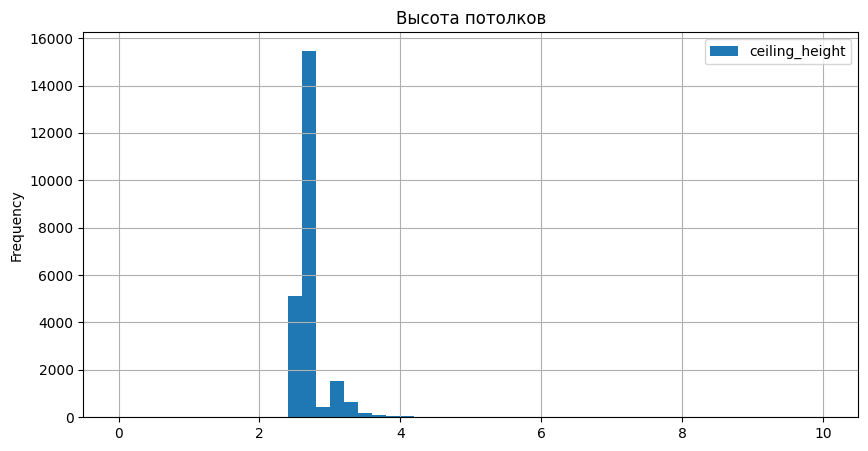

In [37]:
data.plot(y='ceiling_height', kind='hist', bins=50, range=(0, 10), figsize=(10, 5), grid=True, title='Высота потолков');

Замена прошла успешно

**Изучим `floors_total`**

Столбец, всего этажей имеет 86 пропусков, считаю это число незначительным.

In [38]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [39]:
# Ознакомимся с пропусками
data[data['floors_total'].isna()].head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
186             12  11640000.0       65.20           2018-10-02      2   
237              4   2438033.0       28.10           2016-11-23      1   
457              4   9788348.0       70.80           2015-08-01      2   
671              4   6051191.0       93.60           2017-04-06      3   
1757             5   3600000.0       39.00           2017-04-22      1   
1930             1   9750000.0       66.77           2016-05-13      2   
2392             7   5395770.0       53.00           2017-06-29      2   
2846             4   2325000.0       27.80           2016-09-21      1   
2952            10   6500000.0       54.30           2019-04-23      1   
3031             9   6400000.0       56.70           2018-03-27      2   

      ceiling_height  floors_total  living_area  floor is_apartment  studio  \
186             2.65           NaN        30.80      4          NaN   False   
237             2.65           NaN        20.75      1          NaN   False   
457             2.65           NaN        38.40     12          NaN   False   
671             2.65           NaN        47.10      8          NaN   False   
1757            2.65           NaN          NaN      9          NaN   False   
1930            2.65           NaN          NaN      4          NaN   False   
2392            2.65           NaN        29.00     22          NaN   False   
2846            2.65           NaN        19.40     15          NaN   False   
2952            2.65           NaN        22.20      6          NaN   False   
3031            2.65           NaN        32.00     12          NaN   False   

      open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
186       False         12.00      NaN  Санкт-Петербург           39197.0   
237       False           NaN      0.0  Санкт-Петербург           22041.0   
457       False         10.63      0.0  Санкт-Петербург           37364.0   
671       False         16.80      0.0  Санкт-Петербург           22041.0   
1757      False           NaN      0.0  Санкт-Петербург           22735.0   
1930      False           NaN      0.0  Санкт-Петербург           39886.0   
2392      False          9.00      0.0  Санкт-Петербург           43074.0   
2846      False           NaN      0.0  Санкт-Петербург           22041.0   
2952      False         12.30      NaN  Санкт-Петербург           23606.0   
3031      False         12.00      NaN          Кудрово               NaN   

      city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
186                12373.0               1.0          123.0               0.0   
237                17369.0               0.0            NaN               1.0   
457                 8322.0               2.0          309.0               2.0   
671                17369.0               0.0            NaN               1.0   
1757               11618.0               1.0          835.0               1.0   
1930               10660.0               1.0         2276.0               3.0   
2392               10820.0               0.0            NaN               0.0   
2846               17369.0               0.0            NaN               1.0   
2952                3148.0               0.0            NaN               0.0   
3031                   NaN               NaN            NaN               NaN   

      ponds_nearest  days_exposition  
186             NaN             49.0  
237           374.0            251.0  
457           706.0            727.0  
671           374.0            123.0  
1757          652.0             77.0  
1930          244.0             90.0  
2392            NaN             48.0  
2846          374.0            307.0  
2952            NaN              NaN  
3031            NaN            231.0

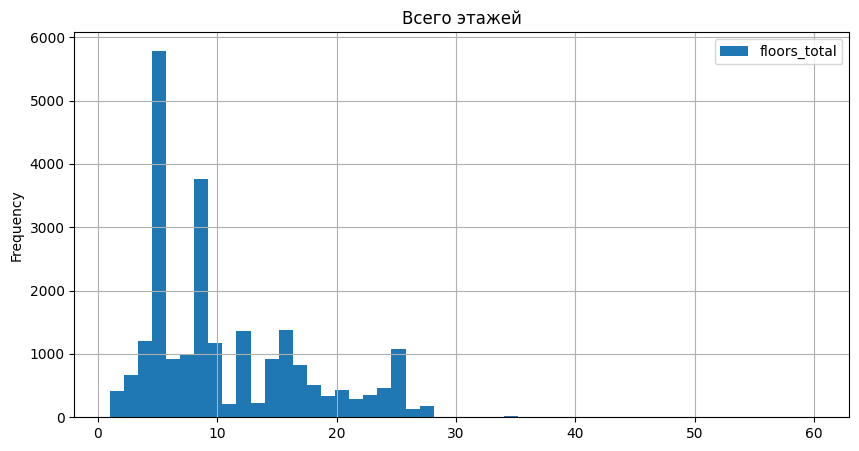

In [40]:
data.plot(y='floors_total', kind='hist', bins=50, figsize=(10, 5), grid=True, title='Всего этажей');

Аномальных значений не наблюдаю

Считаю заменять пропуски медианными значениями будет неправильно, оставим пропуски как есть, почти заменим пропуски на ноль

In [41]:
# Удалим пропуски в столбце floors_total
data.dropna(subset=['floors_total'], inplace=True)

In [42]:
# Переведем значения в столбце floors_total в int

data['floors_total'] = data['floors_total'].astype('int')
data['floors_total'].head()

0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: int64

**Обработаем столбец `living_area`**

Столбец жилая площадь в квадратных метрах (м²) имеет - 1903 пропуска

In [43]:
data['living_area'].describe()

count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

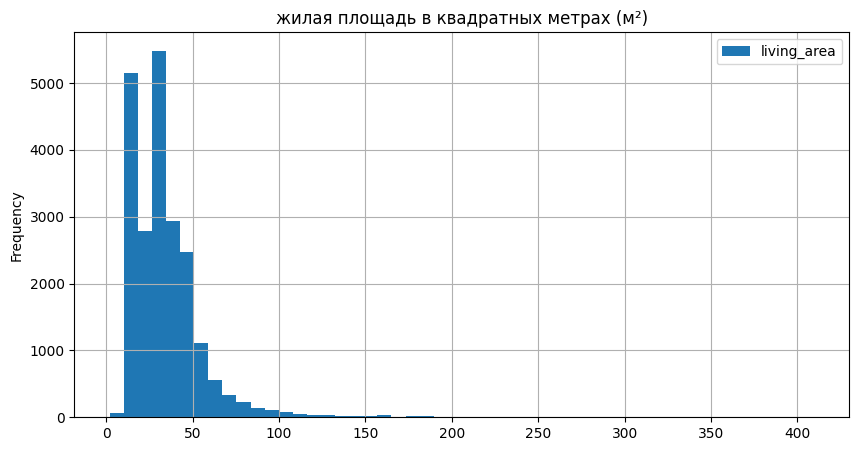

In [44]:
data.plot(y='living_area', kind='hist', bins=50, figsize=(10, 5), grid=True, title='жилая площадь в квадратных метрах (м²)');

Квартира с жилой площадью 2 м² выглядит странно. По данным на 2024 год, минимальный размер студий должен быть не меньше 28 м²

In [45]:
# Проверим сколько квартир с жилой площадью меньше 2 м²

display(data.query('living_area <=2'))

total_images  last_price  total_area first_day_exposition  rooms  \
13915            20   6350000.0        52.0           2018-02-06      2   
21758             0   2330000.0        23.0           2018-01-01      0   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
13915            3.00             6          2.0      2          NaN   False   
21758            2.65            24          2.0     22          NaN    True   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
13915      False           9.0      NaN  Санкт-Петербург           32453.0   
21758      False           NaN      NaN   посёлок Мурино               NaN   

       city_centers_nearest  parks_around3000  parks_nearest  \
13915                6521.0               0.0            NaN   
21758                   NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
13915               1.0         1012.0             91.0  
21758               NaN            NaN             66.0

Природа такого явления не понятна, оставим как есть, чтобы сохранить данные

In [46]:
data[['total_area', 'living_area']].head(20)

total_area  living_area
0       108.00        51.00
1        40.40        18.60
2        56.00        34.30
3       159.00          NaN
4       100.00        32.00
5        30.40        14.40
6        37.30        10.60
7        71.60          NaN
8        33.16        15.43
9        61.00        43.60
10       39.60        20.30
11       44.00        31.00
12       54.00        30.00
13       42.80        27.00
14       36.00        17.00
15       39.00        20.50
16       82.00        55.60
17       36.00        16.50
18       31.00        19.40
19      121.00        76.00

Жилая площадь — это сумма площадей жилых комнат в квартире. К ним относятся спальня, гостиная, детская, кабинет. По этой причине думаю заменить пропуски половиной от общей площади квартиры.

In [47]:
# Заменяем пропуски в 'living_area' используя lambda-функцию
data['living_area'] = data['living_area'].fillna(data['total_area'].map(lambda x: x / 2))

# Проверим замену в датафрейме
data[['total_area', 'living_area']].head(20)

total_area  living_area
0       108.00        51.00
1        40.40        18.60
2        56.00        34.30
3       159.00        79.50
4       100.00        32.00
5        30.40        14.40
6        37.30        10.60
7        71.60        35.80
8        33.16        15.43
9        61.00        43.60
10       39.60        20.30
11       44.00        31.00
12       54.00        30.00
13       42.80        27.00
14       36.00        17.00
15       39.00        20.50
16       82.00        55.60
17       36.00        16.50
18       31.00        19.40
19      121.00        76.00

**Обработаем `is_apartment` и `kitchen_area`**

В столбце is_aparment 20890 пропусков и он булевой тип. Есть предположение, что люди могли просто не заполнить данный столбец, если квартира не студия. Заполнение пропусков в столбце буду выполнять отталкиваясь от столбца kitchen_area, если kitchen_area = NaN, то is_aparment = True, иное is_aparment = False. Такая замена предполагает, что пропуски в столбце is_aparment можно заменить по данным кухни, так как в студии кухня совмещена с жилой комнатой.

In [48]:
# Заполнение пропусков в is_apartment на основе kitchen_area
data.loc[data['kitchen_area'].isna(), 'is_apartment'] = True
data.loc[data['kitchen_area'].notna(), 'is_apartment'] = False

data['is_apartment'].head(20)

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: is_apartment, dtype: object

In [49]:
# Заменим тип данных в столбце на bool
data['is_apartment'] = data['is_apartment'].astype('bool')

Заменим пропуски в столбце kitchen_area

In [50]:
# Для замены пропусков вычислим средний коэффициент отношения площади кухни к общей площади
kitchen_area_coeff = (data['kitchen_area'] / data['total_area']).mean()

In [51]:
# Заполняем пропуски в 'kitchen_area' на основе среднего коэффициента
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area_coeff * data['total_area'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony              

**Расмотрим столбец `balcony`**

Количество пропусков в столбце - 11519. Есть предположение, что количество пропусков зависит от наличия балкона, если он отсутствует значит люди не заполняли данный столбец.

In [52]:
# Осуществляем замену пропусков 0
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

np.int64(0)

In [53]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5532
city_centers_nearest     5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

**Обработаем столбец `locality_name`**

Столбец имеет - 49 пропусков. Оставим все как есть

In [54]:
# Обработаем неявные дубликаты в столбце
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [55]:
data['locality_name'] = (data['locality_name'].str
                         .replace('ё', 'е')
                         .replace(['поселок городского типа ', 'городской поселок '], 'поселок ', regex=True))

data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

Обработка 'city_centers_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition' нецелесообразна из за возможности сильно исказить данные при заполнении пропусков

Проверка на наличие дубликатов

In [56]:
# Проверку осуществим методом duplicated
data.duplicated().sum()

np.int64(0)

## Добавление новыех столбцов

In [57]:
# Добавление цены квадратного метра
data['square_meter_price'] = data['last_price']/data['total_area'].round(decimals=2) # Параметр decimals отвечает за округление

In [58]:
# Определим день публикации объявления
data['week_day'] = data['first_day_exposition'].dt.weekday

In [59]:
# Определим месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

In [60]:
# Определим год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

In [61]:
# Выведем результат добавления на экран
display(data[['first_day_exposition','week_day', 'month', 'year']].head(10))

first_day_exposition  week_day  month  year
0           2019-03-07         3      3  2019
1           2018-12-04         1     12  2018
2           2015-08-20         3      8  2015
3           2015-07-24         4      7  2015
4           2018-06-19         1      6  2018
5           2018-09-10         0      9  2018
6           2017-11-02         3     11  2017
7           2019-04-18         3      4  2019
8           2018-05-23         2      5  2018
9           2017-02-26         6      2  2017

**Добавление типа этажа квартиры (значения — «первый», «последний», «другой»)**

In [62]:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis=1)

In [63]:
data[['floors_total', 'floor', 'floor_category']].head(15)

floors_total  floor floor_category
0             16      8         другой
1             11      1         первый
2              5      4         другой
3             14      9         другой
4             14     13         другой
5             12      5         другой
6             26      6         другой
7             24     22         другой
8             27     26         другой
9              9      7         другой
10            12      3         другой
11             5      4         другой
12             5      5      последний
13             5      5      последний
14             6      1         первый

**Добавление расстояния до центра города в километрах**

In [64]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round(0)

In [65]:
data[['city_centers_nearest', 'city_centers_nearest_km']].head(10)

city_centers_nearest  city_centers_nearest_km
0               16028.0                     16.0
1               18603.0                     19.0
2               13933.0                     14.0
3                6800.0                      7.0
4                8098.0                      8.0
5                   NaN                      NaN
6               19143.0                     19.0
7               11634.0                     12.0
8                   NaN                      NaN
9               15008.0                     15.0

## Исследовательский анализ данных

Выполним базовую проверку данных, ответим на вопросы:

* Сколько всего объявлений?
* Какие населенные пункты встречаются в базе данных?
* Какая временная выборка в базе данных?
* Какая средняя стоимость объекта недвижимости в населенном пункте?
* В каком населенном пункте больше всего объявлений?

In [66]:
# Сколько всего объявлений?
data.shape[0]

23613

In [67]:
# Какие насеянные пункты встречаются в датафрейме можно определить методом unique()
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [68]:
# Какая временная выборка в базе данных?
print(f"Диапазон дат: от {data['first_day_exposition'].min()} до {data['first_day_exposition'].max()}")

Диапазон дат: от 2014-11-27 00:00:00 до 2019-05-03 00:00:00


In [69]:
# Какая средняя стоимость объекта недвижимости в населенном пункте?
average_price = data.groupby('locality_name')['last_price'].mean().round(decimals=2)
average_price.head(40)

locality_name
Бокситогорск        846187.50
Волосово           1977777.78
Волхов             1739909.01
Всеволожск         3789067.75
Выборг             3250983.12
Высоцк             1810000.00
Гатчина            3488336.68
Зеленогорск        6288337.50
Ивангород          1486428.54
Каменногорск       1367692.31
Кингисепп          2461642.31
Кириши             1834624.00
Кировск            2749464.27
Колпино            3964021.44
Коммунар           2770921.35
Красное Село       3821852.27
Кронштадт          4132364.57
Кудрово            4566009.01
Лодейное Поле      1679000.00
Ломоносов          3662879.70
Луга               2156785.71
Любань             1677500.00
Мурино             4105287.35
Никольское         2363567.31
Новая Ладога       1978571.43
Отрадное           2837196.75
Павловск           4929710.53
Петергоф           4423840.80
Пикалево           1006666.67
Подпорожье         1420526.32
Приморск           2122500.00
Приозерск          1995075.76
Пушкин             6469035.95
Санкт-Петербург    8064895.30
Светогорск         1961818.18
Сертолово          3652432.39
Сестрорецк         6341722.08
Сланцы              873125.00
Сосновый Бор       3908129.20
Сясьстрой          1646250.00
Name: last_price, dtype: float64

In [70]:
# В каком населенном пункте больше всего объявлений?

print(data['locality_name'].value_counts().head(1))

locality_name
Санкт-Петербург    15651
Name: count, dtype: int64


**Изучим и опишем параметры:**
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего парка.

**Общая площадь**

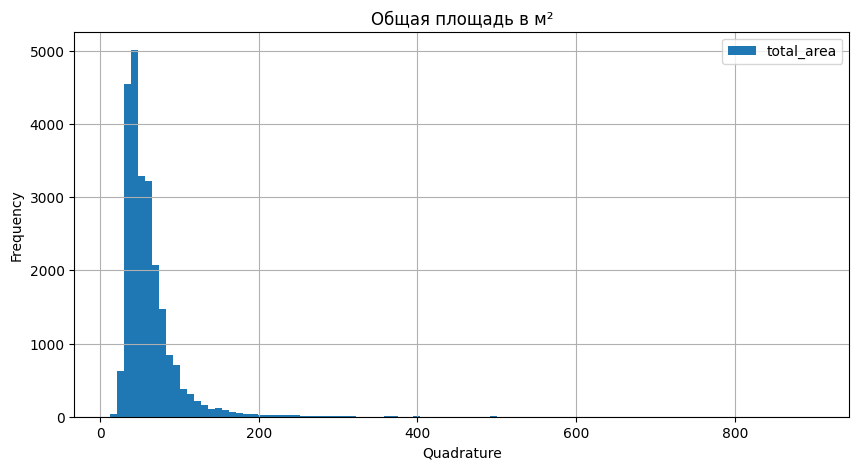

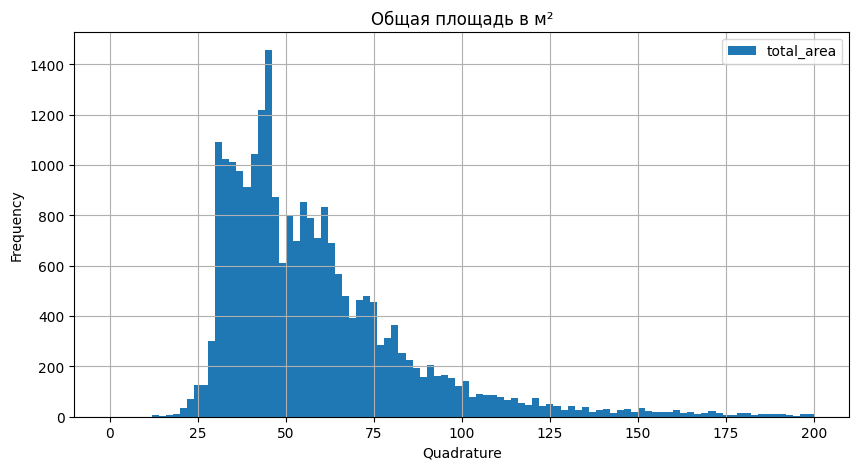

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

In [71]:
# Общая площадь
data.plot(y='total_area', kind='hist', bins=100, figsize=(10, 5), grid=True, title='Общая площадь в м²')
# Задание названия оси абсцисс
plt.xlabel('Quadrature')
# Показать график
plt.show()

data.plot(y='total_area', kind='hist', bins=100, range=(0, 200), figsize=(10, 5),
          grid=True, title='Общая площадь в м²')
# Задание названия оси абсцисс
plt.xlabel('Quadrature')
# Показать график
plt.show()

data['total_area'].describe()

Количество равно - 99


count    23515.0
mean        59.0
std         29.0
min         12.0
25%         40.0
50%         52.0
75%         69.0
max        257.0
Name: total_area, dtype: float64

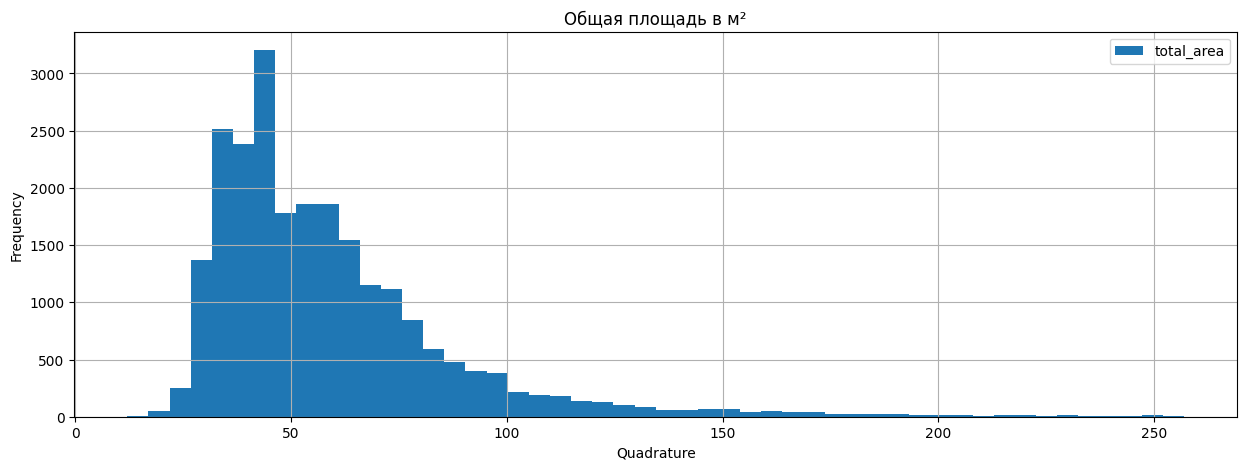

In [72]:
# Подсчет количества квартир с общей площадью 257 м²
count_total_area = data.query('total_area >= 257').shape[0]
print(f'Количество равно - {count_total_area}')


# Построим график, исключив из анализа строки, где общая площадь составляет 257 м² или больше.
data.query('total_area <= 257', inplace=True)

# Проверим замену
display(data['total_area'].describe().round())

data.plot(y='total_area', kind='hist', bins=50, figsize=(15, 5),
          grid=True, title='Общая площадь в м²')

# Задание названия оси абсцисс
plt.xlabel('Quadrature')

# Показать график
plt.show()

По полученным графикам можно сделать вывод, что самый большой показатель площади квартир находится в пределах от ~30 м² (скорее всего это студии) до ~45 м². Недвижимость с показателем значения больше 125 м² не такая популярная на площадке и идет на убывание.

**Жилая площадь**

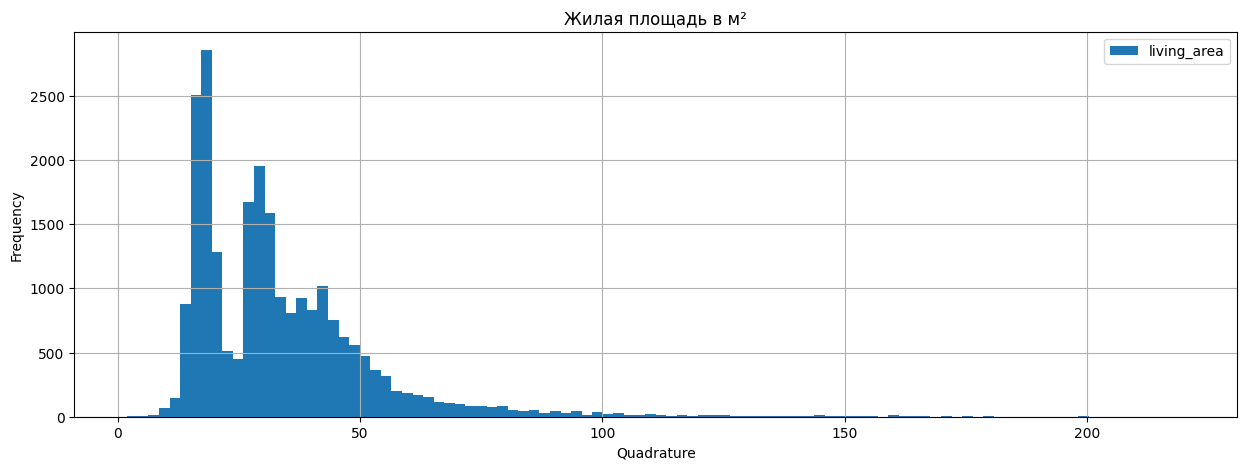

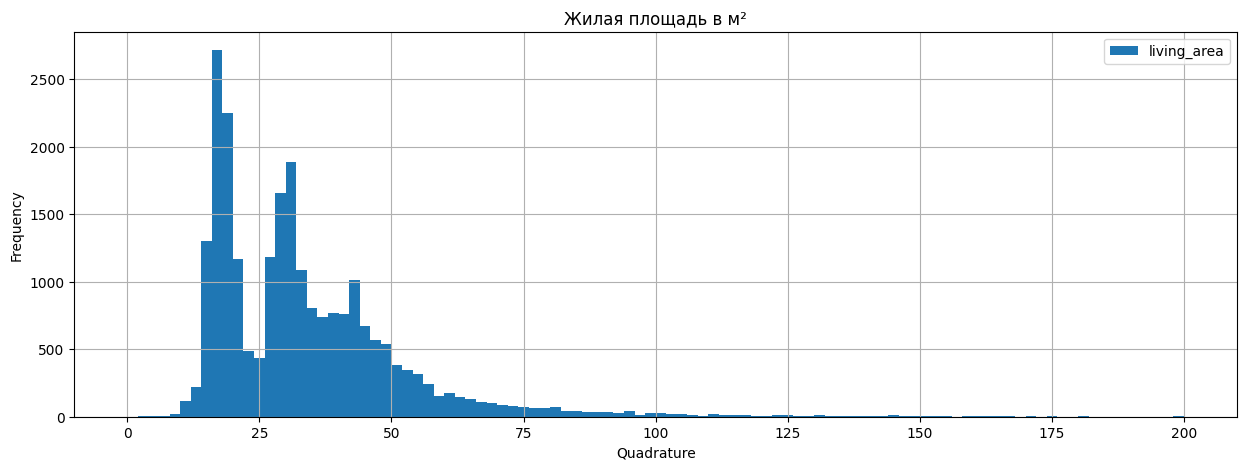

count    23515.000000
mean        33.554271
std         18.936105
min          2.000000
25%         18.800000
50%         30.000000
75%         42.000000
max        220.000000
Name: living_area, dtype: float64

In [73]:
# Жилая площадь
data.plot(y='living_area', kind='hist', bins=100, figsize=(15, 5), grid=True, title='Жилая площадь в м²')
# Задание названия оси абсцисс
plt.xlabel('Quadrature')
# Показать график
plt.show()

data.plot(y='living_area', kind='hist', bins=100, range=(0, 200), figsize=(15, 5),
          grid=True, title='Жилая площадь в м²')
# Задание названия оси абсцисс
plt.xlabel('Quadrature')
# Показать график
plt.show()

data['living_area'].describe()

Количество равно - 96


count    23420.0
mean        33.0
std         17.0
min          2.0
25%         19.0
50%         30.0
75%         42.0
max        132.0
Name: living_area, dtype: float64

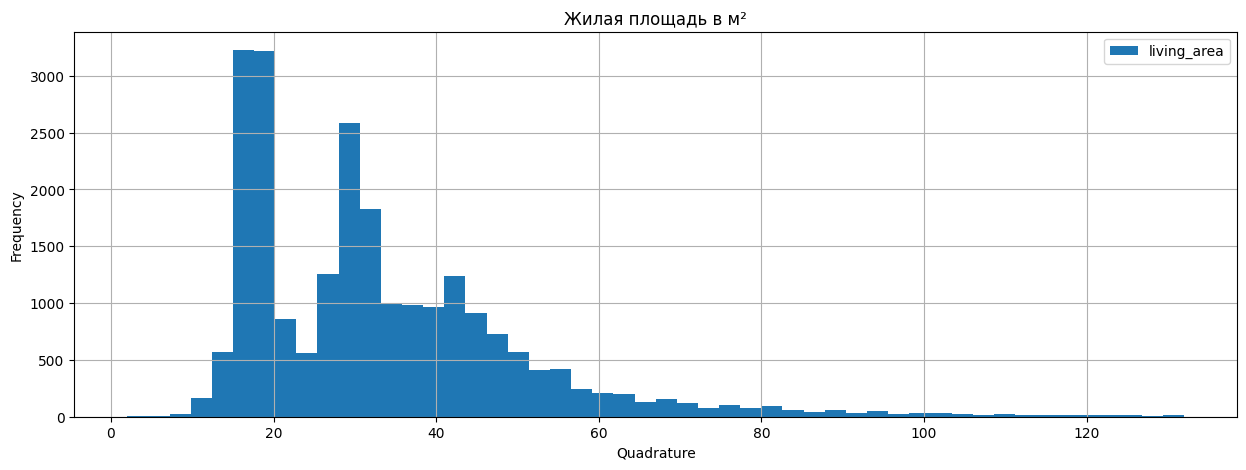

In [74]:
# Подсчет количества квартир с жилой площадью 132 м²

count_living_area = data.query('living_area >= 132').shape[0]
print(f'Количество равно - {count_living_area}')


# Построим график, исключив из анализа строки, где жилая площадь составляет 140 м² или больше.
data.query('living_area <= 132', inplace=True)

# Проверим замену
display(data['living_area'].describe().round())

data.plot(y='living_area', kind='hist', bins=50, figsize=(15, 5),
          grid=True, title='Жилая площадь в м²')

# Задание названия оси абсцисс
plt.xlabel('Quadrature')

# Показать график
plt.show()

Наибольшая доля приходится на жилые помещения с площадью от 16 до 20 м². Затем наблюдается неожиданное снижение доли для помещений площадью от 22 примерно до 30 м². При этом разница между медианой и средним значением незначительна.

**Площадь кухни**

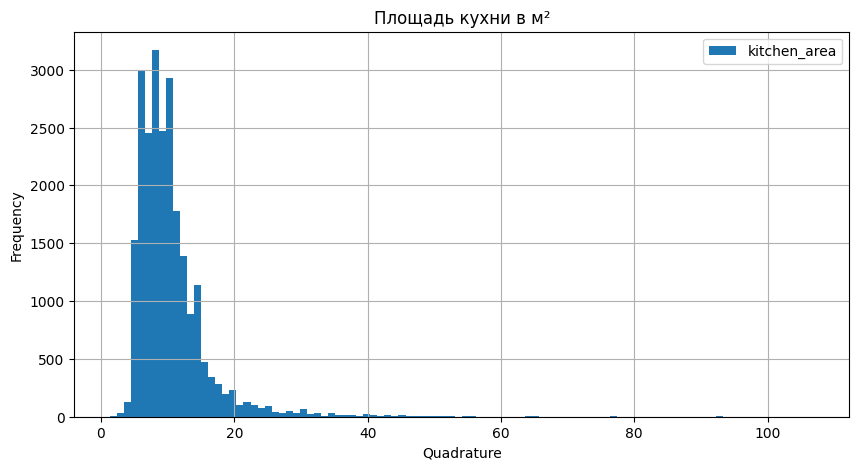

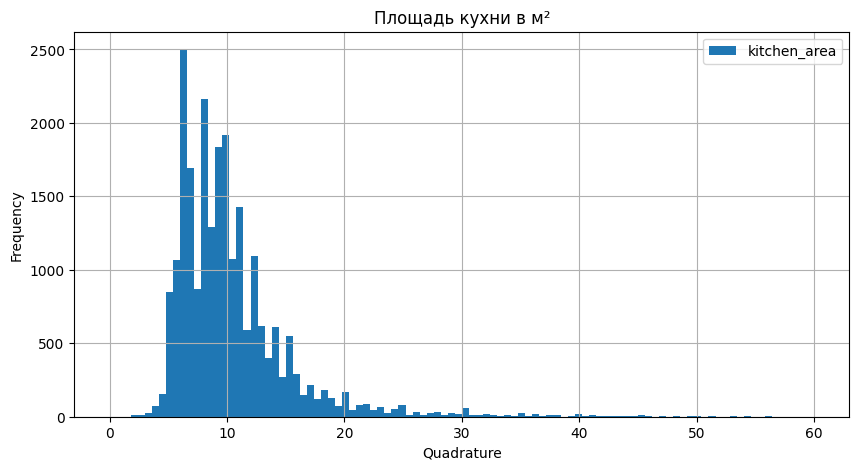

count    23420.000000
mean        10.383626
std          5.501995
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

In [75]:
# Площадь кухни

data.plot(y='kitchen_area', kind='hist', bins=100, figsize=(10, 5), grid=True, title='Площадь кухни в м²')

# Задание названия оси абсцисс
plt.xlabel('Quadrature')

# Показать график
plt.show()

data.plot(y='kitchen_area', kind='hist', bins=100, range=(0, 60), figsize=(10, 5),
          grid=True, title='Площадь кухни в м²')

# Задание названия оси абсцисс
plt.xlabel('Quadrature')

# Показать график
plt.show()

data['kitchen_area'].describe()

Количество равно - 91


count    23331.0
mean        10.0
std          5.0
min          1.0
25%          7.0
50%          9.0
75%         12.0
max         42.0
Name: kitchen_area, dtype: float64

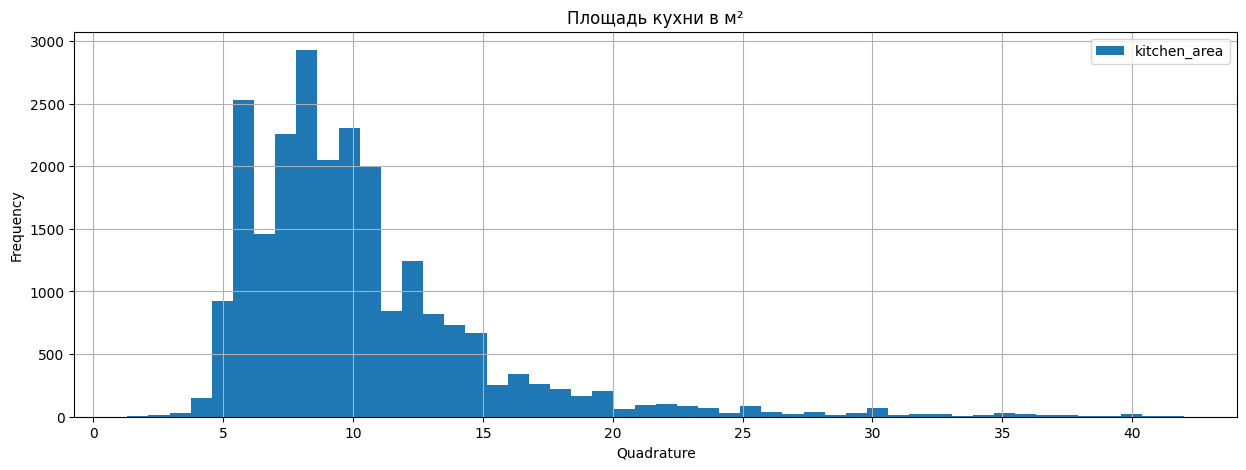

In [76]:
# Подсчет количества квартир с площадью кухни от 42 м²
count_kitchen_area = data.query('kitchen_area >= 42').shape[0]
print(f'Количество равно - {count_kitchen_area}')


# Построим график, исключив из анализа строки, где площадь кухни составляет 42 м² или больше.
data.query('kitchen_area <= 42', inplace=True)

# Проверим замену
display(data['kitchen_area'].describe().round())

data.plot(y='kitchen_area', kind='hist', bins=50, figsize=(15, 5),
          grid=True, title='Площадь кухни в м²')
# Задание названия оси абсцисс
plt.xlabel('Quadrature')
# Показать график
plt.show()

По показателям площади кухни можно сделать вывод, что самая популярная квадратура для кухни это от 6 до 11 м².

**Цена объекта**

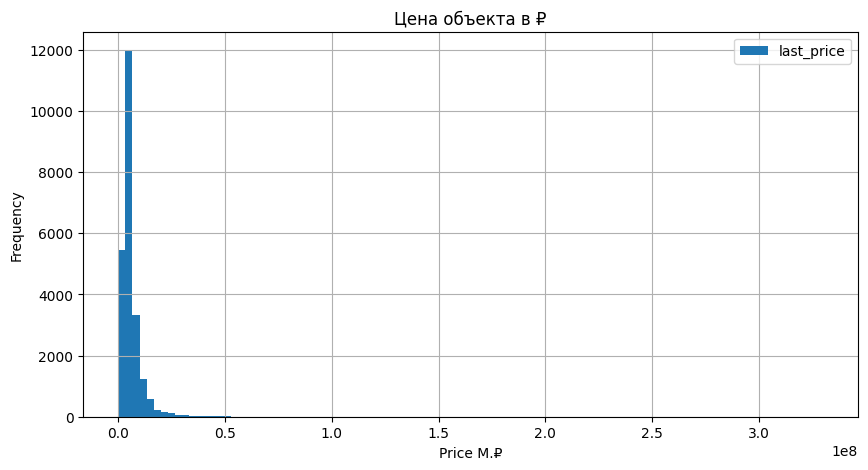

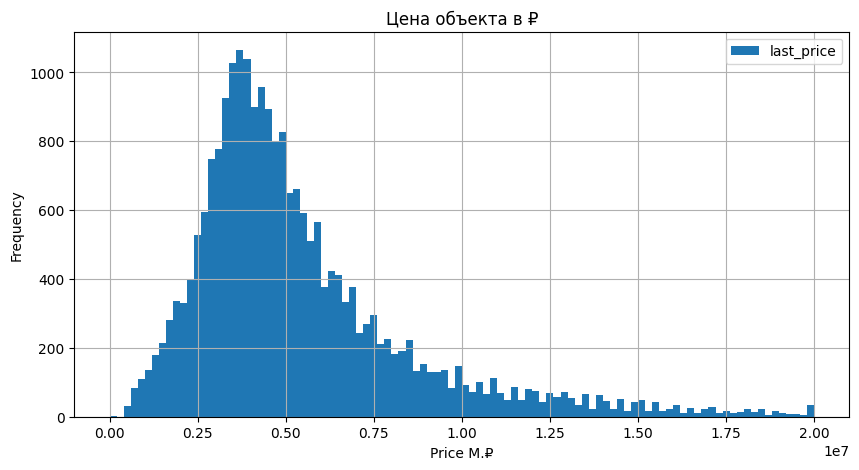

count        23331.0
mean       5986743.0
std        6182101.0
min          12190.0
25%        3400000.0
50%        4600000.0
75%        6650000.0
max      330000000.0
Name: last_price, dtype: float64

In [77]:
# Цена объекта
data.plot(y='last_price', kind='hist', bins=100, figsize=(10, 5), grid=True, title='Цена объекта в ₽')
# Задание названия оси абсцисс
plt.xlabel('Price M.₽')
# Показать график
plt.show()

data.plot(y='last_price', kind='hist', bins=100, range=(0, 20000000), figsize=(10, 5),
          grid=True, title='Цена объекта в ₽')
# Задание названия оси абсцисс
plt.xlabel('Price M.₽')
# Показать график
plt.show()

data['last_price'].describe().round()

In [78]:
pd.qcut(data['last_price'], q=12)

0        (11300000.0, 330000000.0]
1           (2980949.0, 3400000.0]
2           (5100000.0, 5750000.0]
3        (11300000.0, 330000000.0]
4          (8045000.0, 11300000.0]
5           (2300000.0, 2980949.0]
6           (3400000.0, 3800000.0]
7           (6650000.0, 8045000.0]
8           (2300000.0, 2980949.0]
9           (5100000.0, 5750000.0]
10          (4600000.0, 5100000.0]
11          (2980949.0, 3400000.0]
12          (3800000.0, 4200000.0]
13          (3400000.0, 3800000.0]
14          (4200000.0, 4600000.0]
15          (4600000.0, 5100000.0]
16          (6650000.0, 8045000.0]
17          (3800000.0, 4200000.0]
18          (2980949.0, 3400000.0]
19       (11300000.0, 330000000.0]
20          (5750000.0, 6650000.0]
21          (2980949.0, 3400000.0]
22          (4600000.0, 5100000.0]
23          (2300000.0, 2980949.0]
24          (5750000.0, 6650000.0]
25          (6650000.0, 8045000.0]
26          (3800000.0, 4200000.0]
27          (6650000.0, 8045000.0]
28          (3800000.0, 4200000.0]
29         (8045000.0, 11300000.0]
30          (12189.999, 2300000.0]
31          (6650000.0, 8045000.0]
32          (4600000.0, 5100000.0]
33          (4600000.0, 5100000.0]
34          (2980949.0, 3400000.0]
35       (11300000.0, 330000000.0]
36          (3400000.0, 3800000.0]
37          (12189.999, 2300000.0]
38          (2980949.0, 3400000.0]
39          (5100000.0, 5750000.0]
40          (3400000.0, 3800000.0]
41          (6650000.0, 8045000.0]
42       (11300000.0, 330000000.0]
43         (8045000.0, 11300000.0]
44          (5100000.0, 5750000.0]
45          (5100000.0, 5750000.0]
46          (5750000.0, 6650000.0]
47          (3400000.0, 3800000.0]
48          (3400000.0, 3800000.0]
49          (2980949.0, 3400000.0]
50          (4200000.0, 4600000.0]
52       (11300000.0, 330000000.0]
53          (4200000.0, 4600000.0]
54          (2980949.0, 3400000.0]
55          (6650000.0, 8045000.0]
56          (4200000.0, 4600000.0]
57          (2980949.0, 3400000.0]
58          (3800000.0, 4200000.0]
59          (5750000.0, 6650000.0]
60          (2300000.0, 2980949.0]
61          (6650000.0, 8045000.0]
62          (4600000.0, 5100000.0]
63       (11300000.0, 330000000.0]
64          (2980949.0, 3400000.0]
65          (4200000.0, 4600000.0]
66          (3400000.0, 3800000.0]
67          (2300000.0, 2980949.0]
68          (3800000.0, 4200000.0]
69          (3800000.0, 4200000.0]
70          (2980949.0, 3400000.0]
71          (4600000.0, 5100000.0]
72          (4200000.0, 4600000.0]
73          (4600000.0, 5100000.0]
74          (2300000.0, 2980949.0]
75          (4600000.0, 5100000.0]
76          (2300000.0, 2980949.0]
77          (4200000.0, 4600000.0]
78          (4200000.0, 4600000.0]
79          (2300000.0, 2980949.0]
80          (3800000.0, 4200000.0]
81         (8045000.0, 11300000.0]
82          (4200000.0, 4600000.0]
83          (3800000.0, 4200000.0]
84          (2300000.0, 2980949.0]
85          (5100000.0, 5750000.0]
86          (4200000.0, 4600000.0]
87          (4600000.0, 5100000.0]
88          (12189.999, 2300000.0]
89          (2300000.0, 2980949.0]
90          (5750000.0, 6650000.0]
91          (12189.999, 2300000.0]
92          (3800000.0, 4200000.0]
93          (3400000.0, 3800000.0]
94          (3400000.0, 3800000.0]
95          (5100000.0, 5750000.0]
96         (8045000.0, 11300000.0]
97          (4600000.0, 5100000.0]
98       (11300000.0, 330000000.0]
99         (8045000.0, 11300000.0]
100         (3400000.0, 3800000.0]
101         (2980949.0, 3400000.0]
102         (3400000.0, 3800000.0]
103         (4600000.0, 5100000.0]
104         (6650000.0, 8045000.0]
105         (4600000.0, 5100000.0]
106        (8045000.0, 11300000.0]
107        (8045000.0, 11300000.0]
108        (8045000.0, 11300000.0]
109         (6650000.0, 8045000.0]
110         (3800000.0, 4200000.0]
111         (4200000.0, 4600000.0]
112         (2300000.0, 2980949.0]
113         (5100000.0, 5750000.0]
114         (3800000.0, 4200000.0]
115       

Количество равно - 100


count     0.023233
mean      5.747636
std       4.203447
min       0.012190
25%       3.400000
50%       4.600000
75%       6.600000
max      38.000000
Name: last_price, dtype: float64

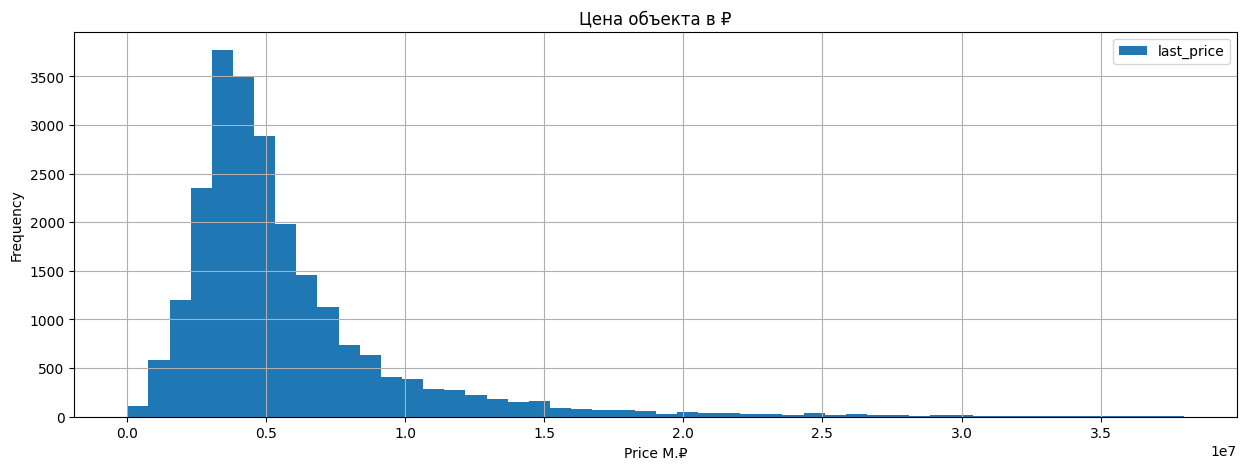

In [79]:
# Подсчет количества квартир с ценой от 38000000
count_last_price = data.query('last_price >= 38000000').shape[0]
print(f'Количество равно - {count_last_price}')

# Построим график, исключив из анализа строки, в которых цена квартиры равна или превышает 38000000 рублей.
data.query('last_price <= 38000000', inplace=True)
# Проверим замену
display(data['last_price'].describe() / 1000000)
data.plot(y='last_price', kind='hist', bins=50, figsize=(15, 5),
          grid=True, title='Цена объекта в ₽')
# Задание названия оси абсцисс
plt.xlabel('Price M.₽')
# Показать график
plt.show()

Данные распределены нормально, общая картина ясна. Самая популярная стоимость квартир в районе 3.75 млн.руб

**Количество комнат**

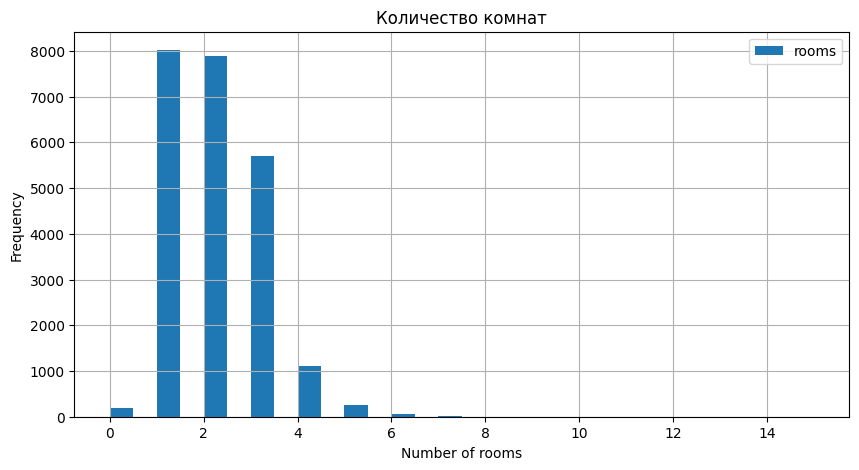

In [80]:
# Количество комнат
data.plot(y='rooms', kind='hist', bins=30, range=(0, 15), figsize=(10, 5), grid=True, title='Количество комнат')
# Задание названия оси абсцисс
plt.xlabel('Number of rooms')
# Показать график
plt.show()

Количество равно - 25


count    23230.000000
mean         2.027249
std          0.986450
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

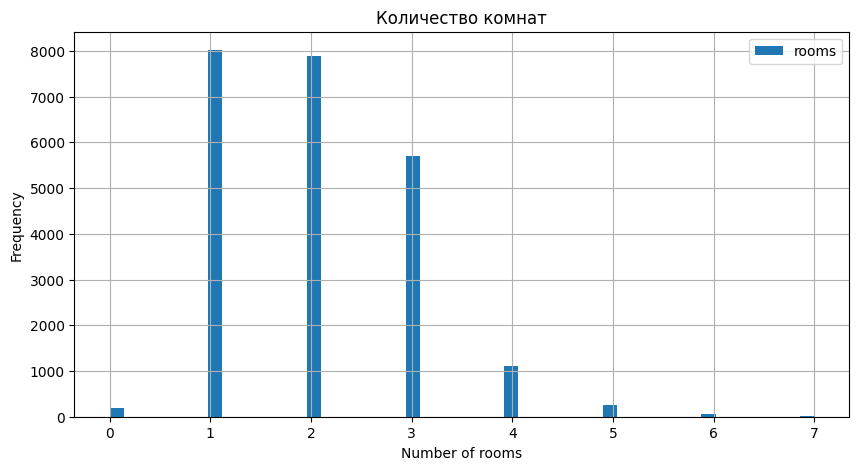

In [81]:
# Подсчет количества квартир с количеством комнат от 7, это делается исходя из графика выше

count_rooms = data.query('rooms >= 7').shape[0]
print(f'Количество равно - {count_rooms}')
# Построим график, исключив из анализа строки, где количество комнат составляет 7 или меньше.
data.query('rooms <= 7', inplace=True)
# Проверим замену
display(data['rooms'].describe())

data.plot(y='rooms', kind='hist', bins=50, range=(0, 7), figsize=(10, 5),
          grid=True, title='Количество комнат')
# Задание названия оси абсцисс
plt.xlabel('Number of rooms')

# Показать график
plt.show()

На гистограмме видно, что наибольшее количество объявлений приходится на квартиры с 1 или 2 комнатами. Как и ожидалось, наименее распространены объявления о квартирах с 7 и более комнатами. Квартиры студии тоже не популярны. Распределение данных близко к нормальному.

**Высота потолков**

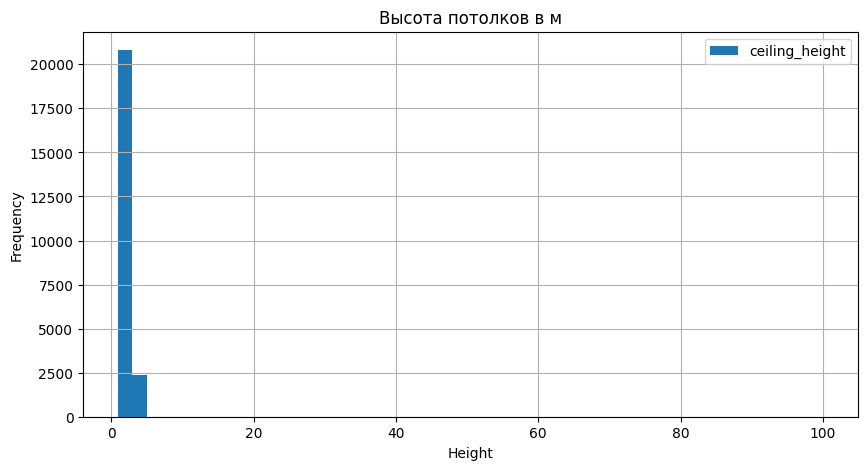

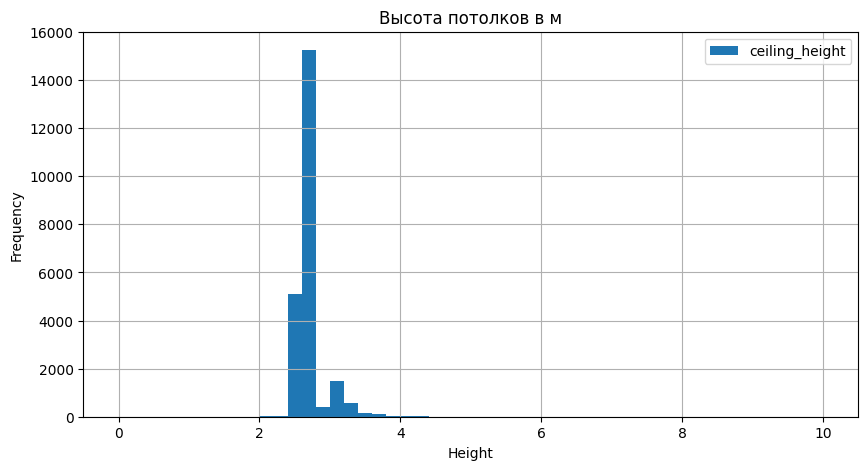

count    23230.000000
mean         2.718414
std          0.994902
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [82]:
# Высота потолков
data.plot(y='ceiling_height', kind='hist', bins=50, figsize=(10, 5), grid=True, title='Высота потолков в м')
# Задание названия оси абсцисс
plt.xlabel('Height')
# Показать график
plt.show()

data.plot(y='ceiling_height', kind='hist', bins=50, range=(0, 10), figsize=(10, 5),
          grid=True, title='Высота потолков в м')
# Задание названия оси абсцисс
plt.xlabel('Height')
# Показать график
plt.show()

data['ceiling_height'].describe()

Количество равно - 33


count    23125.000000
mean         2.691109
std          0.203862
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

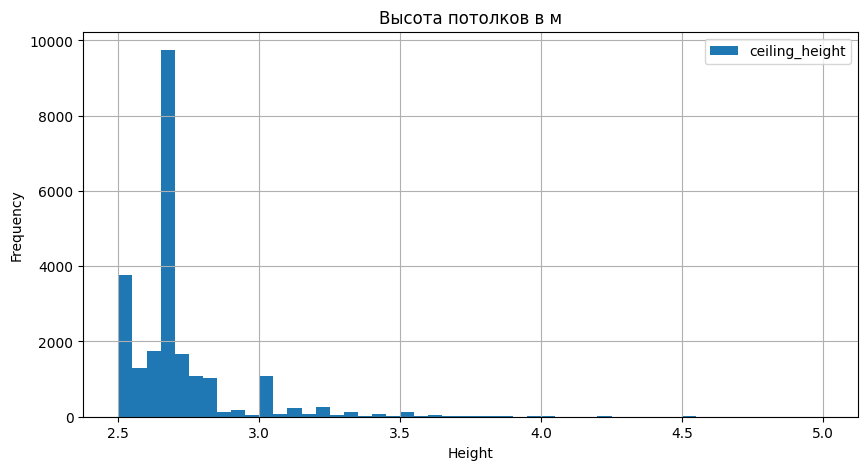

In [83]:
# Подсчет количества квартир с высотой потолков от 5 метров, это делается исходя из графика выше
count_ceiling_high = data.query('ceiling_height >= 5').shape[0]
print(f'Количество равно - {count_ceiling_high}')

# Построим график, исключив из анализа строки, где высота потолков превышает 5 метров или менее 2,5 метров.
data.query('ceiling_height >= 2.5 and ceiling_height <= 5', inplace=True)
# Проверим замену
display(data['ceiling_height'].describe())

data.plot(y='ceiling_height', kind='hist', bins=50, figsize=(10, 5),
          grid=True, title='Высота потолков в м')
# Задание названия оси абсцисс
plt.xlabel('Height')
# Показать график
plt.show()

Больше всего квартир с высотой потолков от ~2,5 до ~3 метров. Медианное значение высоты потолков после коррекции составило 2,65 метра.

**Тип этажа квартиры («первый», «последний», «другой»)**

<Axes: >

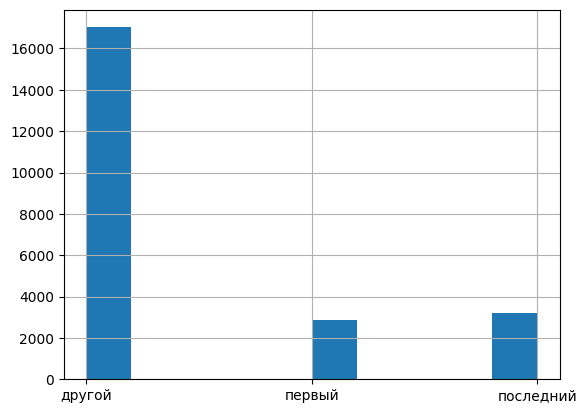

In [84]:
# Тип этажа квартиры

data['floor_category'].hist()

Из графика видно, что люди неохотно покупают недвижимость на первых и последних этажах.

**Общее количество этажей в доме**

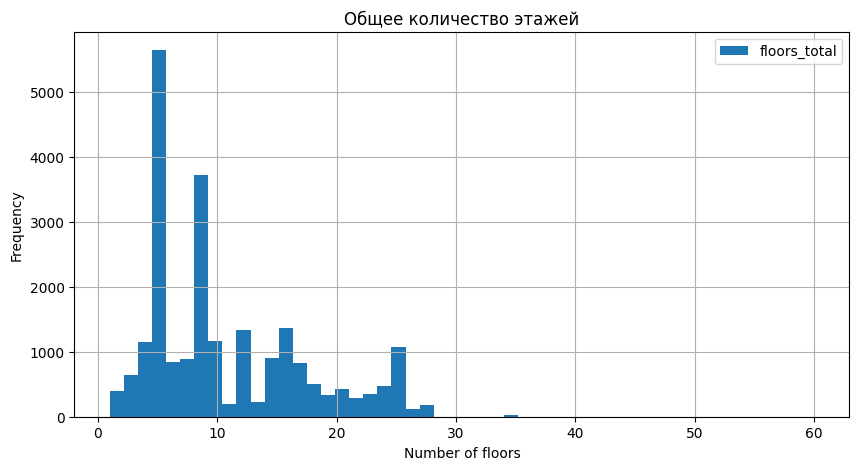

count    23125.000000
mean        10.740757
std          6.616084
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [85]:
# Общее количество этажей в доме
data.plot(y='floors_total', kind='hist', bins=50, figsize=(10, 5), grid=True, title='Общее количество этажей')
# Задание названия оси абсцисс
plt.xlabel('Number of floors')
# Показать график
plt.show()

data['floors_total'].describe()

По графику видно, что в датафрейме преобладают здания с этажностью от 6 до 9 этажей. Это, вероятно, связано с тем, что в датафрейме преобладают объявления из Санкт-Петербурга, где в центре города запрещена высотная застройка.

**Расстояние до центра города в метрах**

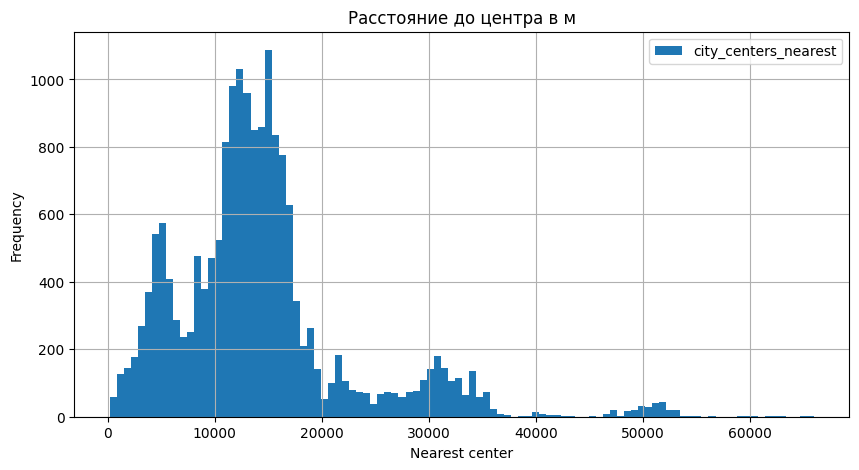

count    17667.000000
mean     14346.586064
std       8590.872948
min        181.000000
25%       9551.000000
50%      13199.000000
75%      16378.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [86]:
# Расстояние до центра города в метрах
data.plot(y='city_centers_nearest', kind='hist', bins=100, figsize=(10, 5), grid=True, title='Расстояние до центра в м')
# Задание названия оси абсцисс
plt.xlabel('Nearest center')
# Показать график
plt.show()

data['city_centers_nearest'].describe()

По графику можно сказать, что в датафрейме чаще всего встречаются данные с отдаленностью от центра в районе 15 км

**Расстояние до ближайшего парка**

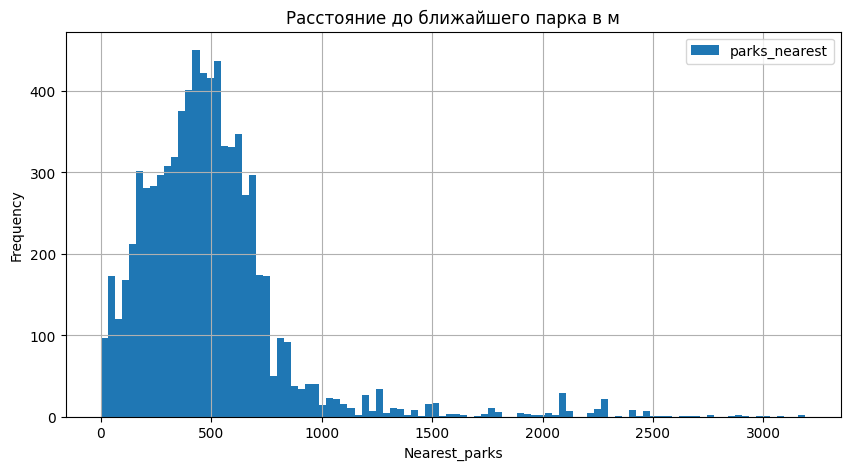

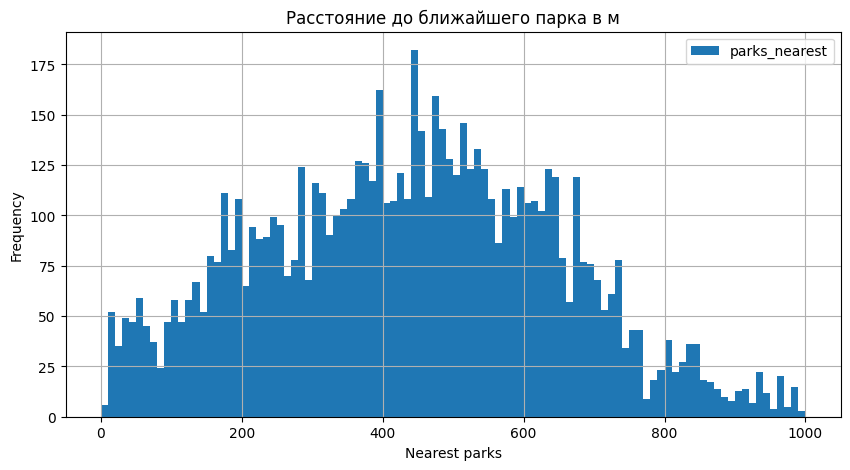

count    7747.000000
mean      493.620756
std       343.005180
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [87]:
# Расстояние до ближайшего парка
data.plot(y='parks_nearest', kind='hist', bins=100, figsize=(10, 5), grid=True, title='Расстояние до ближайшего парка в м')
# Задание названия оси абсцисс
plt.xlabel('Nearest_parks')
# Показать график
plt.show()

data.plot(y='parks_nearest', kind='hist', bins=100, range=(0, 1000), figsize=(10, 5), grid=True, title='Расстояние до ближайшего парка в м')
# Задание названия оси абсцисс
plt.xlabel('Nearest parks')
# Показать график
plt.show()

data['parks_nearest'].describe()

По данным графика видно, что люди стараются чаще покупать недвижимость ближе к паркам. Самое популярное расстояние варьируется от 400 до 500 метров. Распределение данных близко к нормальному

**Изучите, как быстро продавались квартиры (столбец `days_exposition`)**

- Построим гистограмму
- Рассчитаем среднее и медиану столбца
- Опишем, сколько обычно занимает продажа недвижимости
- Определим какие продажи можно считать быстрыми, а какие — необычно долгими.

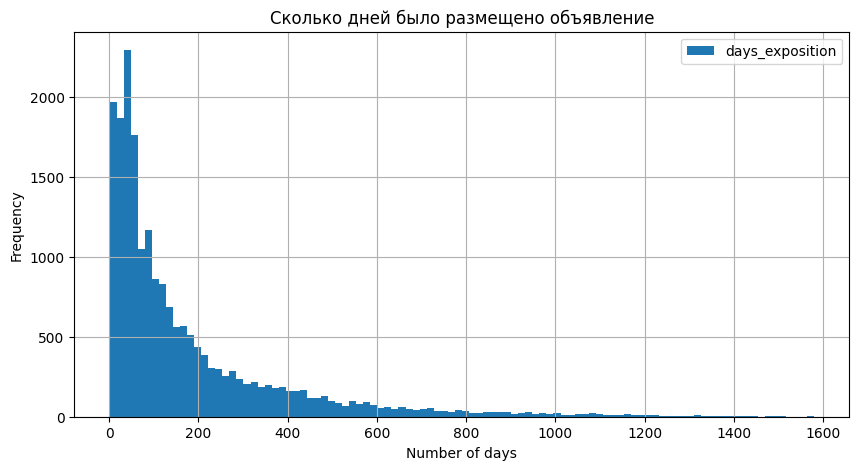

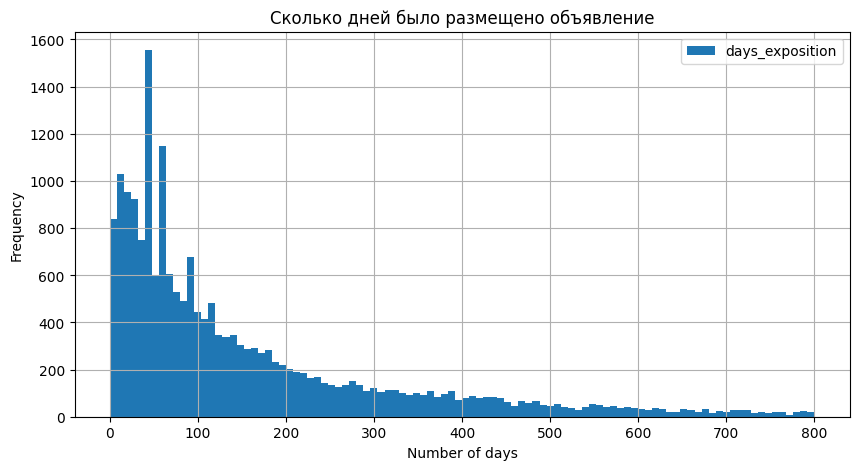

count    20066.000000
mean       179.131067
std        217.867201
min          1.000000
25%         45.000000
50%         94.000000
75%        228.750000
max       1580.000000
Name: days_exposition, dtype: float64

days_exposition
45.0      872
60.0      538
7.0       231
30.0      205
90.0      184
4.0       176
3.0       157
5.0       147
14.0      142
9.0       139
20.0      138
44.0      138
8.0       134
11.0      133
10.0      127
13.0      126
18.0      124
28.0      124
6.0       123
15.0      123
22.0      123
21.0      122
29.0      120
19.0      120
35.0      117
24.0      116
17.0      116
34.0      113
23.0      111
42.0      111
54.0      110
12.0      107
27.0      107
59.0      106
43.0      106
61.0      105
74.0      104
26.0      101
89.0      100
16.0       99
63.0       98
37.0       96
67.0       92
40.0       89
32.0       89
46.0       88
33.0       88
36.0       87
64.0       87
52.0       84
56.0       84
25.0       83
92.0       81
39.0       80
53.0       79
38.0       78
48.0       77
47.0       76
84.0       75
41.0       75
65.0       74
70.0       74
57.0       74
55.0       74
113.0      72
58.0       71
66.0       71
68.0       71
72.0       70
62.0       70
85.0       70
91.0       69
71.0       69
93.0       68
104.0      68
75.0       68
98.0       68
69.0       68
49.0       67
31.0       66
97.0       66
80.0       65
112.0      65
116.0      65
73.0       64
82.0       63
88.0       63
119.0      62
95.0       62
120.0      61
77.0       60
79.0       60
50.0       60
83.0       59
86.0       58
81.0       58
118.0      57
117.0      57
102.0      57
105.0      56
103.0      56
139.0      55
76.0       55
96.0       54
115.0      54
111.0      53
100.0      53
107.0      53
106.0      53
99.0       51
51.0       51
134.0      51
78.0       50
114.0      50
145.0      50
94.0       49
168.0      48
131.0      48
126.0      48
110.0      47
161.0      46
137.0      46
130.0      46
143.0      46
108.0      46
123.0      44
179.0      44
132.0      44
144.0      44
142.0      44
125.0      43
135.0      43
133.0      43
154.0      43
121.0      43
87.0       42
146.0      42
101.0      41
150.0      41
180.0      41
160.0      41
151.0      40
140.0      40
124.0      39
155.0      39
109.0      39
141.0      39
156.0      39
162.0      39
136.0      39
138.0      38
147.0      38
181.0      37
199.0      37
182.0      37
172.0      37
127.0      37
163.0      36
191.0      36
128.0      36
166.0      36
189.0      35
174.0      35
159.0      34
157.0      34
158.0      34
152.0      34
216.0      33
149.0      33
122.0      33
167.0      33
176.0      32
165.0      32
153.0      32
232.0      32
178.0      32
173.0      32
175.0      31
202.0      31
169.0      31
188.0      31
193.0      31
217.0      31
183.0      30
210.0      30
196.0      30
170.0      30
164.0      30
211.0      29
201.0      29
197.0      29
186.0      29
185.0      28
245.0      28
177.0      28
219.0      28
129.0      27
203.0      27
171.0      26
190.0      26
195.0      26
205.0      26
215.0      25
272.0      25
225.0      25
218.0      25
184.0      25
187.0      24
239.0      24
200.0      24
209.0      23
388.0      23
194.0      23
198.0      23
207.0      23
228.0      23
238.0      23
208.0      23
233.0      23
231.0      22
246.0      22
214.0      22
226.0      22
192.0      22
229.0      22
204.0      22
249.0      22
285.0      22
313.0      21
350.0      21
271.0      21
222.0      21
259.0      21
273.0      21
252.0      21
264.0      21
277.0      21
240.0      21
278.0      20
266.0      20
244.0      20
385.0      20
280.0      20
212.0      20
325.0      19
224.0      19
265.0      19
206.0      19
286.0      19
300.0      19
324.0      19
251.0      19
284.0      19
237.0      19
307.0      19
213.0      19
275.0      18
241.0      18
301.0      18
263.0      18
296.0      18
235.0      18
253.0      18
383.0      18
268.0      18
335.0      18
468.0      17
364.0      17
220.0      17
290.0      17
370.0      17
360.0      17
230.0      17
279.0      17
294.0      17
306.0      17
256.0      17
261.0      17
418.0      17
276.0      17
227.0      16
365.0      16
439.0      16
329.0      16
289.0   

In [88]:
data.plot(y='days_exposition', kind='hist', bins=100, figsize=(10, 5), grid=True,
          title='Сколько дней было размещено объявление')
# Задание названия оси абсцисс
plt.xlabel('Number of days')
# Показать график
plt.show()

data.plot(y='days_exposition', kind='hist', bins=100, range=(0, 800), figsize=(10, 5), grid=True,
          title='Сколько дней было размещено объявление')
# Задание названия оси абсцисс
plt.xlabel('Number of days')
# Показать график
plt.show()
# Выведем основные статистические показатели (среднее, стандартное отклонение, минимум, максимум, квартили)
display(data['days_exposition'].describe())

data['days_exposition'].value_counts()

Среднее значение столбца составляет ~181 день, а медиана ~94 дней

По графикам видно наличие ярко выраженных выбросов, что также подтверждается анализом квартилей, полученных с помощью метода *describe()*. Эти выбросы соответствуют значениям 45, 60 и 94 дней

По медианному значению в 94 дней можно сказать, что в среднем квартиры на площадке продаются примерно за 3 месяца.

Быстрой продажей можно считать сделки, завершенные в промежутке от 1 до 14 дней. Долгую продажу можно выделить как продажи, которые занимают 500 дней и более

**Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта**

 - общая площадь;
 - жилая площадь;
 - площадь кухни;
 - количество комнат;
 - тип этажа, на котором расположена квартира (первый, последний, другой);
 - дата размещения (день недели, месяц, год).

Цена на момент снятия с публикации находится в столбце `last_price`, построим диаграммы рассеяния, чтобы оценить взаимосвязь столбцов

**Общая площадь, жилая площадь, площадь кухни**

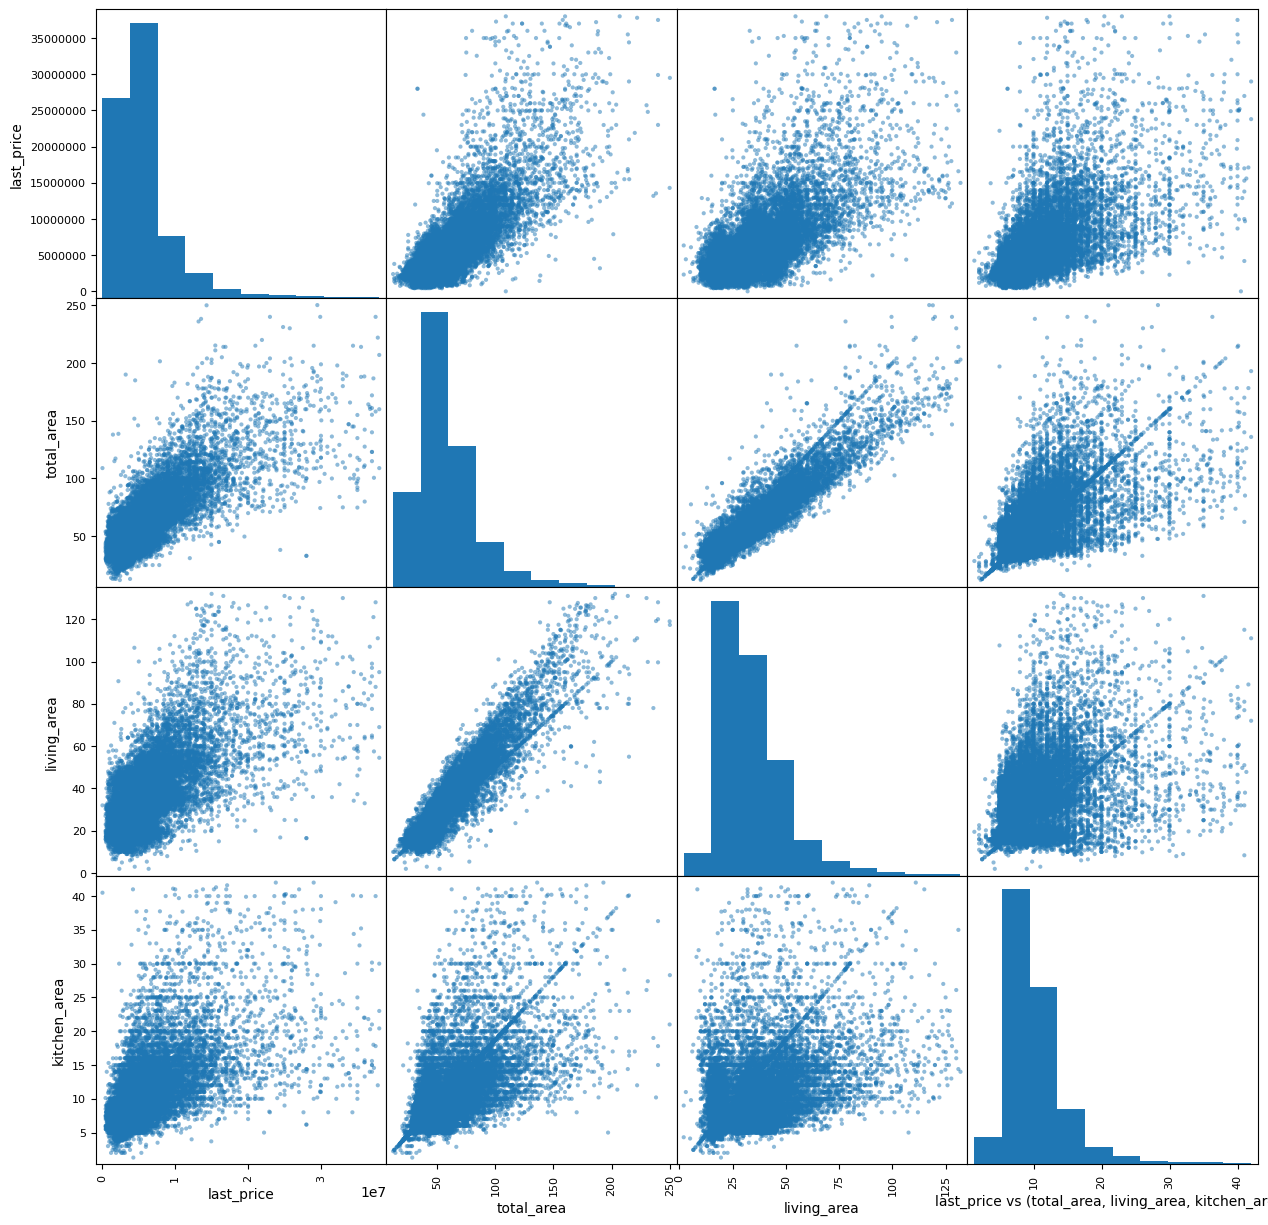

In [89]:
columns_to_plot = ['last_price', 'total_area', 'living_area', 'kitchen_area']
pd.plotting.scatter_matrix(data[columns_to_plot], figsize=(15, 15))

# Задание названия оси абсцисс
plt.xlabel('last_price vs (total_area, living_area, kitchen_area)')

# Показать график
plt.show()

In [90]:
data[columns_to_plot].corr()

last_price  total_area  living_area  kitchen_area
last_price      1.000000    0.778015     0.674727      0.603957
total_area      0.778015    1.000000     0.926520      0.603651
living_area     0.674727    0.926520     1.000000      0.381673
kitchen_area    0.603957    0.603651     0.381673      1.000000

Из приведенных выше графиков можно сделать вывод, что все три показателя, выраженные в квадратных метрах, примерно одинаково влияют на цену продажи. Корреляции в этих столбцах по отношению к цене продаж имеют довольно высокий коэффициент.

**Количество комнат**

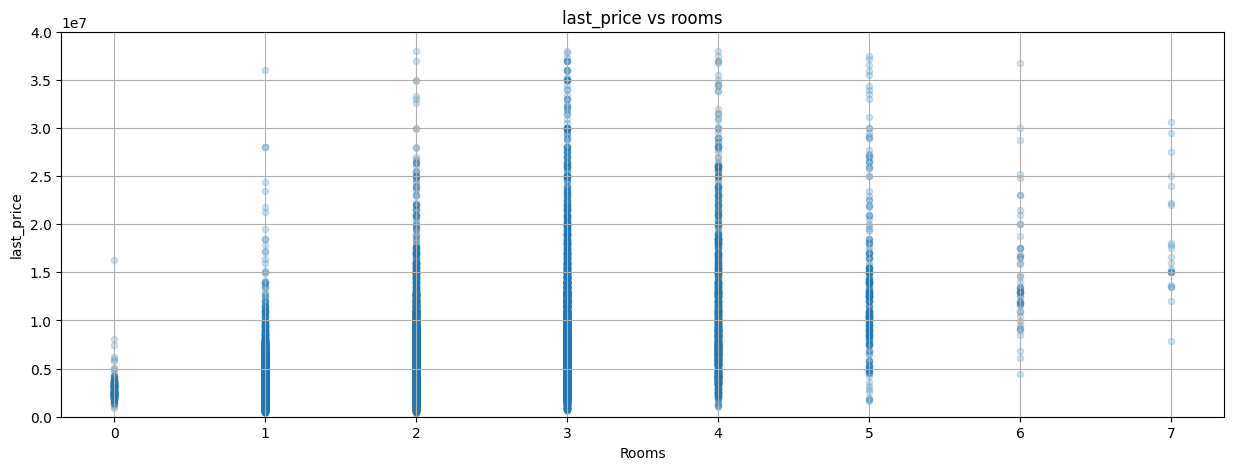

In [91]:
# Построим график
data.plot(x='rooms', y='last_price', kind='scatter', figsize=(15,5),  grid=True, alpha=0.2,
                  title='last_price vs rooms')
# Построим график с ограниченной осью y
plt.ylim(0, 40000000)
# Задание названия оси абсцисс
plt.xlabel('Rooms')
# Показать график
plt.show()

In [92]:
# Вычислим коэффициент корреляции
data['rooms'].corr(data['last_price'])

np.float64(0.48867657902104894)

По графику заметно, что зависимость увеличивается до 3 комнат, а дальше идёт на спад.

**Тип этажа, на котором расположена квартира (первый, последний, другой)**

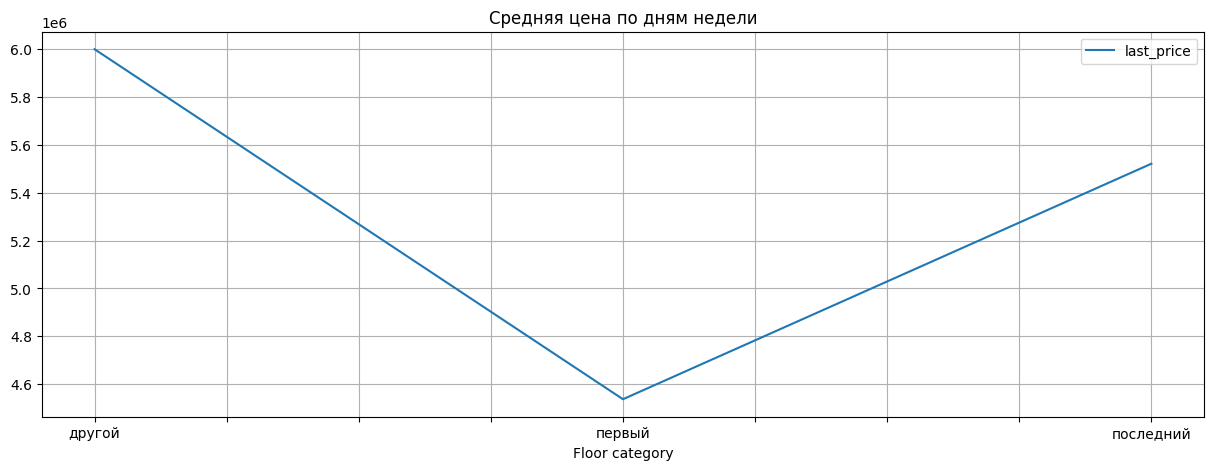

In [93]:
# Построим график
data.pivot_table(index='floor_category', values='last_price', aggfunc='mean').plot(
    grid=True, figsize=(15, 5), title='Средняя цена по дням недели')
# Задание названия оси абсцисс
plt.xlabel('Floor category')
# Показать график
plt.show()

По графику видно, что квартиры на первом этаже имеют наименьшую стоимость. Квартиры на последнем этаже лишь немного дешевле, чем на других этажах.

**Дата размещения (день недели, месяц, год)**

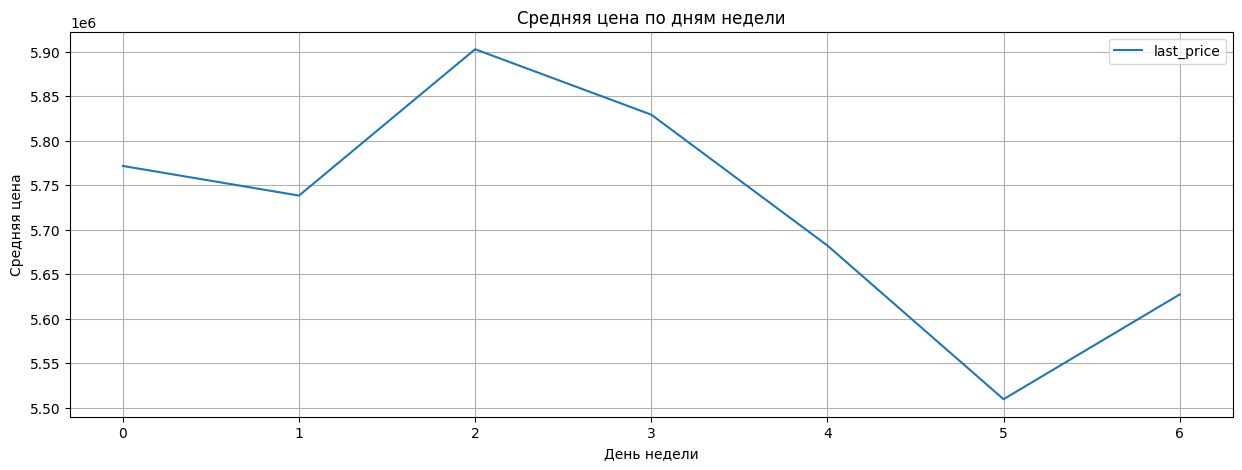

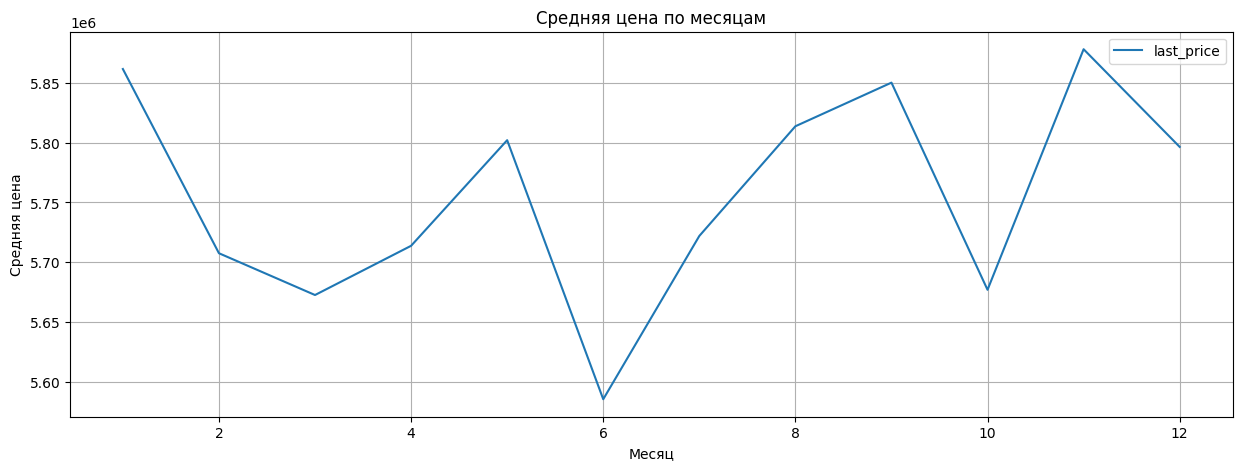

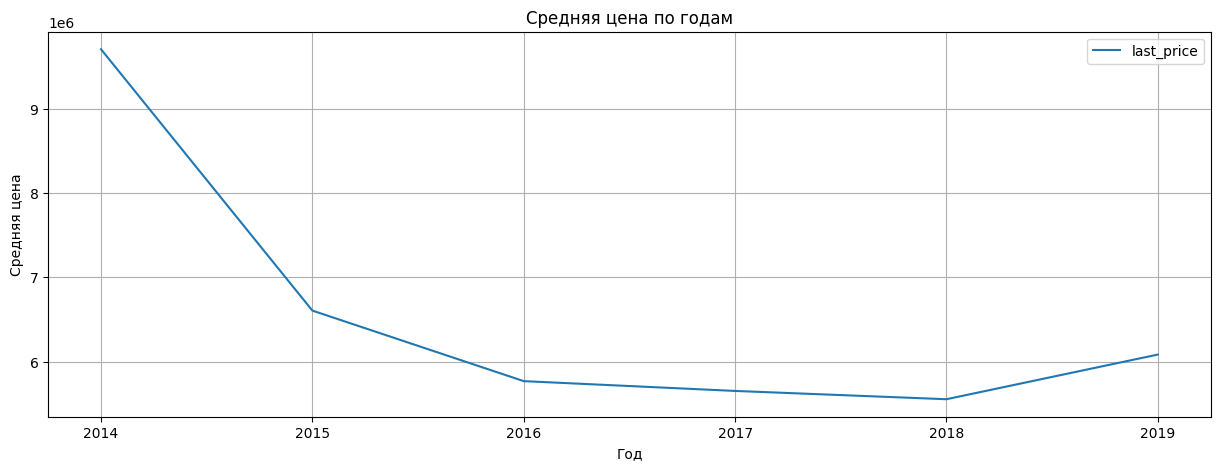

In [94]:
# График средней цены по дням недели

data.pivot_table(index='week_day', values='last_price', aggfunc='mean').plot(
    grid=True, figsize=(15, 5), title='Средняя цена по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средняя цена')
plt.show()

# График средней цены по месяцам
data.pivot_table(index='month', values='last_price', aggfunc='mean').plot(
    grid=True, figsize=(15, 5), title='Средняя цена по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена')
plt.show()

# График средней цены по годам
data.pivot_table(index='year', values='last_price', aggfunc='mean').plot(
    grid=True, figsize=(15, 5), title='Средняя цена по годам')
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.show()

По данным графиков видно, что покупатели чаще всего совершают сделки по недвижимости в пятницу (первый график), что приводит к повышению спроса и, следовательно, цены. По второму графику можно заметить, что цены поднимаются к концу года, а в декабре особенно резко возрастают, вероятно, из-за сдачи объектов. Третий график показывает, что с 2014 года цены на недвижимость снижались до 2018 года, после чего начали расти и вернулись на уровень предыдущего года.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
 - Выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [95]:
# Создим своднаую таблицу
locality = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count','mean'])
locality.columns = ['Количество объявлений', 'Средняя цена за квадратный метр']
locality = locality.sort_values('Количество объявлений', ascending=False)
locality = locality[:10]
locality

Количество объявлений  Средняя цена за квадратный метр
locality_name                                                            
Санкт-Петербург                    15230                    111262.971161
поселок Мурино                       549                     85602.500519
поселок Шушары                       439                     78551.344545
Всеволожск                           397                     68719.320400
Пушкин                               359                    102865.225783
Колпино                              336                     75352.475583
поселок Парголово                    326                     90205.423758
Гатчина                              306                     68757.678644
деревня Кудрово                      299                     92473.547576
Выборг                               235                     58238.143141

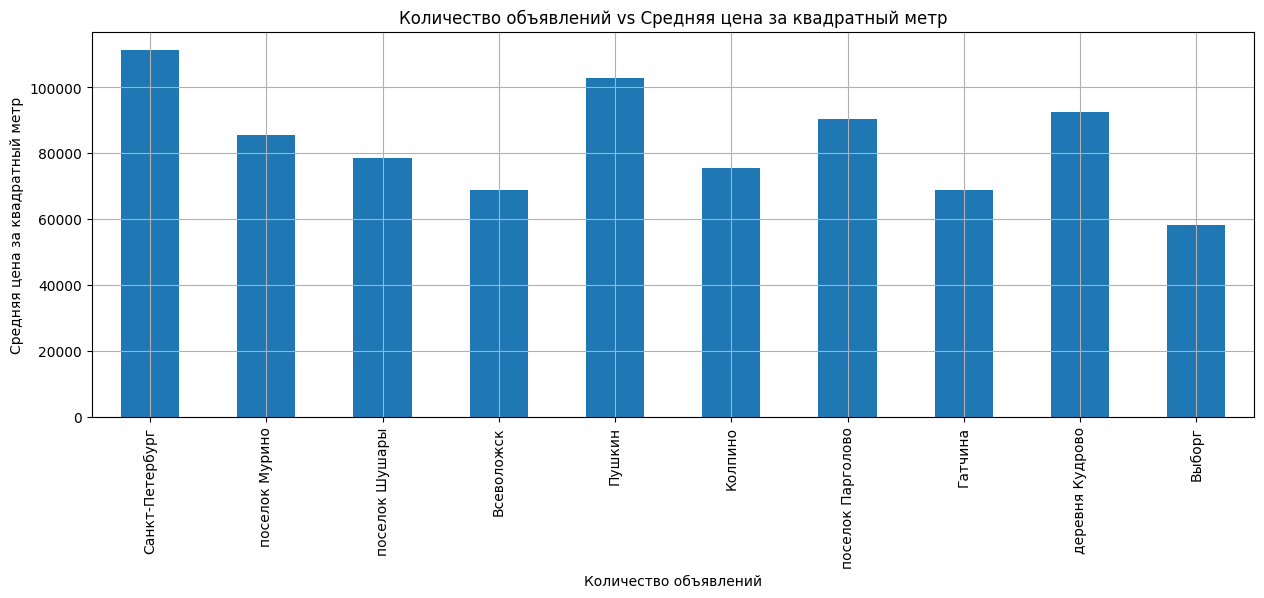

In [96]:
locality['Средняя цена за квадратный метр'].plot(x='Количество объявлений', y='Средняя цена за квадратный метр', kind='bar', figsize=(15,5),  grid=True,
                  title='Количество объявлений vs Средняя цена за квадратный метр')
plt.xlabel('Количество объявлений')
plt.ylabel('Средняя цена за квадратный метр')
plt.show()

Определим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычисилим их среднюю стоимость на разном удалении от центра.
 - учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
 - описано, как стоимость объекта зависит от расстояния до центра города;
 - построен график изменения средней цены для каждого километра от центра Петербурга.

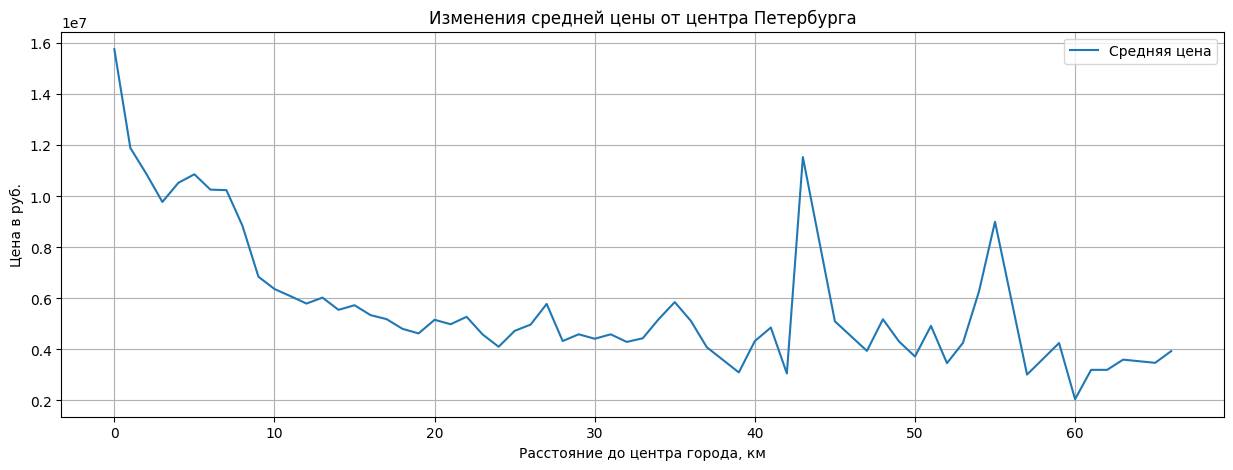

In [97]:
spb_locality = (
    data.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc=['mean'])
    .round(decimals=2).plot(grid=True, figsize=(15, 5), title='Изменения средней цены от центра Петербурга'))

# Задание названия
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Цена в руб.')
plt.legend(['Средняя цена'])

# Показать график
plt.show()

Из графика видно, что в целом, чем дальше недвижимость находится от центра, тем она дешевле. Однако есть несколько выбросов, которые, вероятно, связаны с тем, что на этих расстояниях расположены более населенные пункты, чем деревни и села, что приводит к росту цен.

## Общий вывод

В данной работе был проведен исследовательский анализ данных с целью изучения факторов, влияющих на продажу квартир в Санкт-Петербурге и соседних населенных пунктах. Анализ охватывал различные аспекты данных, начиная с предобработки и заканчивая выявлением ключевых факторов, определяющих рыночную стоимость недвижимости.

**Предобработка Данных**

1. **Пропуски в данных:**  
   Были обнаружены пропуски в нескольких столбцах, включая `ceiling_height`, `living_area` и `is_apartment` и т. д. Пропуски были заполнены логически обоснованными значениями, например, медианными значениями или по аналогии с похожими объектами.

2. **Изменение типов данных:**  
   Для некоторых столбцов были изменены типы данных для удобства анализа, например, преобразование дат в формат `datetime` и преобразование категорий в числовые значения для дальнейшего анализа.

3. **Обработка дубликатов:**  
   В результате анализа были выявлены и устранены дубликаты данных, такие как повторяющиеся объявления о продаже квартир и неявные дубликаты, связанные с разными вариантами написания названий населенных пунктов.

4. **Добавление новых столбцов:**  
   Для улучшения качества анализа были добавлены новые столбцы, такие как категория удаленности объекта от центра города и цена квадратного метра.

**Исследовательский Анализ Данных**

1. **Общая площадь недвижимости:**
   Выявлено, что наиболее востребованные квартиры имеют площадь от 30 до 45 м². Наблюдаются выбросы, связанные с элитной недвижимостью, превышающей 120 м².

2. **Площадь жилых помещений:**
   Наиболее популярные квартиры имеют жилую площадь от 16 до 20 м². Наибольший спрос на квартиры с жилой площадью около 20 м².

3. **Площадь кухни:**
   В среднем площадь кухни в квартирах составляет от 6 до 11 кв. м, что соответствует потребностям семей среднего размера.

4. **Цена:**
   Наиболее востребованные квартиры имеют цену от 3 до 5 миллионов рублей, что составляет основной сегмент рынка.

5. **Количество комнат:**
   Двухкомнатные квартиры являются самыми популярными, за ними следуют однокомнатные и трехкомнатные квартиры.

6. **Высота потолков:**
   Большинство квартир имеют стандартную высоту потолков в 2,5-3,0 метра, что соответствует нормам для жилья массового строительства.

7. **Категория этажа:**
   Квартиры, расположенные не на первом и не на последнем этажах, пользуются наибольшим спросом, что связано с предпочтениями покупателей по уровню комфорта.

8. **Этажность здания:**
   Многоквартирные дома средней этажности (от 6 до 9 этажей) наиболее популярны, что связано с особенностями застройки в Санкт-Петербурге и пригородах.

9. **Расстояние до центра города:**
   Квартиры, расположенные ближе к центру, дороже, однако наибольший спрос наблюдается на жилье, находящееся на умеренном удалении от центра, что обусловлено сочетанием цены и доступности.

10. **Расстояние до ближайшего парка:**
    Квартиры, находящиеся рядом с парком, продаются быстрее, что указывает на важность наличия зеленых зон поблизости.

11. **Скорость Продаж:**
    Быстрая продажа недвижимости наблюдается в течение первых 3 месяцев с момента публикации объявления. Продажи, длившиеся более года, указывают на переоцененные объекты или низкий спрос.

**Факторы, Влияющие на Цену**

1. **Площадь недвижимости:**  
   Общая, жилая и площадь кухни имеют значительное влияние на цену недвижимости, подтверждая ожидания покупателей относительно комфорта и функциональности жилья.

2. **Количество комнат:**  
   Двухкомнатные квартиры и трехкомнатные квартиры остаются наиболее популярными среди покупателей, что делает их наилучшим вариантом для инвестиций.

3. **Этаж:**  
   Квартиры на первом и последнем этажах менее востребованы, что связано с их меньшим удобством и возможными проблемами, такими как шум или недостаток освещения.

4. **Время продажи:**  
   Пиковые периоды продаж приходятся на весну и осень и конец года в декабре, а остальные зимние месяцы характеризуются снижением активности на рынке недвижимости.

5. **Рейтинг населенных пунктов:**  
   Санкт-Петербург ожидаемо занял первое место по популярности и стоимости недвижимости, что подтверждает его статус центра экономической и культурной жизни региона.

6. **Зависимость Цены от Расположения:**
   Чем ближе квартира к центру города, тем выше ее стоимость. Однако, стоимость жилья значительно падает с увеличением расстояния до центра, что отражает баланс между доступностью и престижностью.

**Заключение**
В результате исследования были выявлены ключевые факторы, влияющие на стоимость недвижимости в Санкт-Петербурге и пригородах. Эти результаты могут быть использованы для дальнейшего совершенствования моделей ценообразования и разработки рекомендаций для продавцов и покупателей недвижимости.